# Step 2a Global analysis of 670nm excitation TA of WL-PSI of SCy6803

### Inspect data

In [89]:
from cycler import cycler
from glotaran.io import load_parameters, save_result
from glotaran.optimization.optimize import optimize
from glotaran.project.scheme import Scheme
from pyglotaran_extras.plotting.plot_overview import plot_overview
from pyglotaran_extras.plotting.style import PlotStyle
from pyglotaran_extras.plotting.plot_traces import (
    plot_fitted_traces,
    select_plot_wavelengths,
)
from pyglotaran_extras.inspect import show_a_matrixes


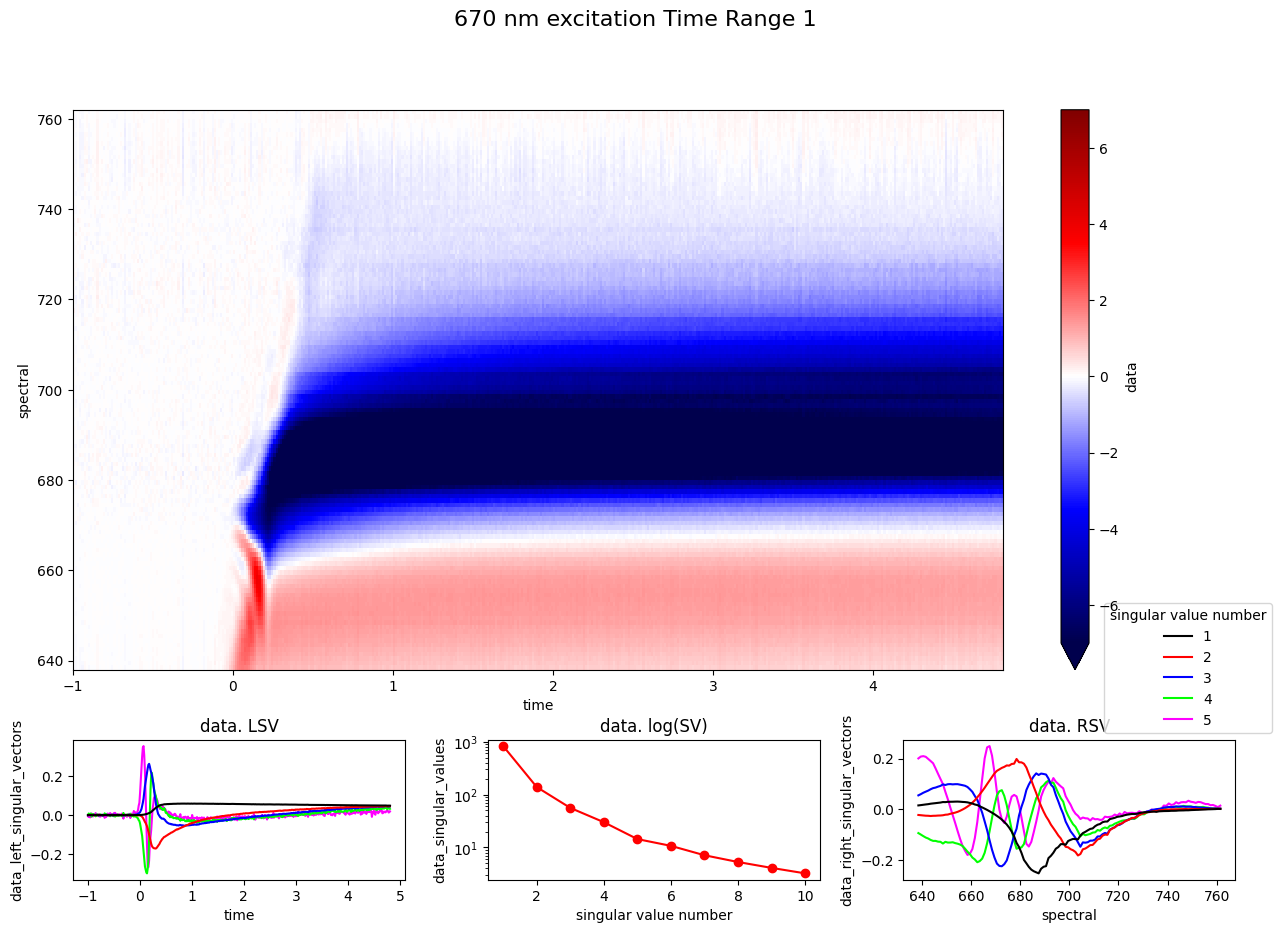

In [90]:
from pyglotaran_extras import plot_data_overview

DATA_PATH1 = "data/SCy6803WL/synWTred670_700nm_exc2RPnocycle1nm_reva.ascii"
DATA_PATH2 = "data/SCy6803WL/synWTred670_700nm_exc2RPnocycle1nm_revb.ascii"
DATA_PATH3 = "data/SCy6803WL/synWTred670_700nm_exc2RPnocycle1nm_revc.ascii"
DATA_PATH4 = "data/SCy6803WL/synWTred670_700nm_exc2RPnocycle1nm_revd.ascii"
fig, axes = plot_data_overview(
    DATA_PATH1,
    nr_of_data_svd_vectors=5,
    linlog=False,
    cmap="seismic",
    vmin=-7,
    vmax=7,
    use_svd_number=True,
    title="670 nm excitation Time Range 1",
)
# change color map seismic or bwr
# axes[0].set_cmap('seismic')


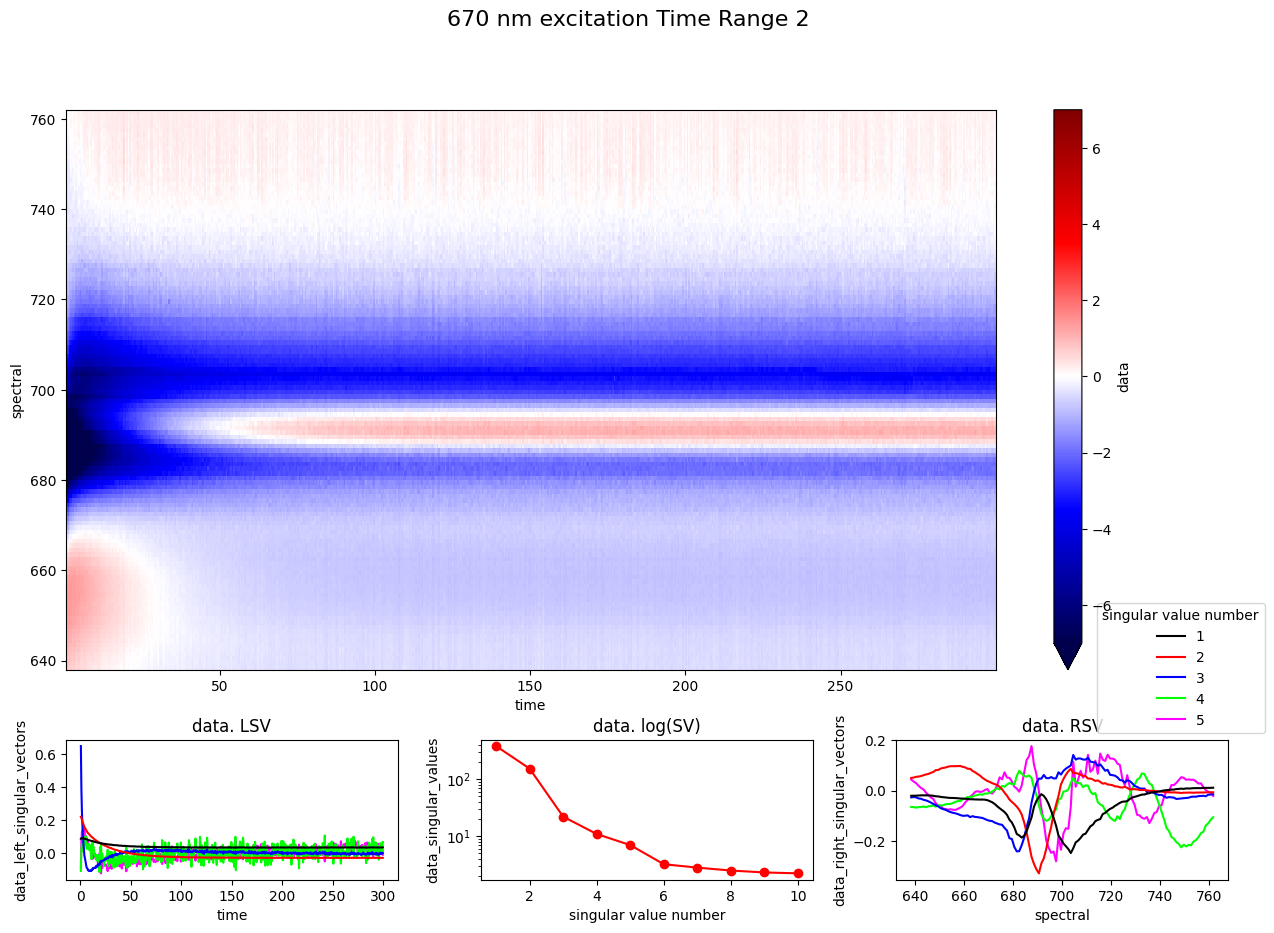

In [91]:
fig, axes = plot_data_overview(
    DATA_PATH2,
    nr_of_data_svd_vectors=5,
    linlog=False,
    linthresh=10,
    cmap="seismic",
    vmin=-7,
    vmax=7,
    use_svd_number=True,
    title="670 nm excitation Time Range 2",
)


## Global Analysis

### Used model and parameters

#### Model file

In [92]:
global_model_path = "models/global_step1_model_PSI_TA_SCy6803WL670_without_DOAS.yml"


In [93]:
# Uncomment the following 2 lines to display the global model file in the notebook
from glotaran.utils.ipython import display_file
display_file(global_model_path, syntax="yaml")

# Alternatively (recommended), open the file in a text editor to see the model definition


```yaml
# default_megacomplex: decay
dataset_groups:
  default:
    residual_function: variable_projection
    link_clp: True

dataset:
  # TA datasets
  670TR1:
    # megacomplex: [complex670]
    megacomplex: [complex670, artifact670]
    # megacomplex: [complex670, artifact670]
    # megacomplex_scale: [scalem.1,scalem.freeChl]
    initial_concentration: input670
    irf: irf1
    scale: scale.670
  670TR2:
    # megacomplex: [complex670TR2]
    megacomplex: [complex670]
    # megacomplex_scale: [scalem.1,scalem.freeChl]
    initial_concentration: input670
    irf: irf1
    scale: scale.670TR2

megacomplex:
  # unique for TA
  complex670:
    type: decay
    k_matrix: [km670]
  artifact670:
    type: coherent-artifact
    order: 3
    width: artifact.CAwidth

# how can i now express that the first 20 lines
# are common for complexes 1-5, and the next 11 lines
# are common for complexes 1-4? how can i specify in chunks?
# note that earlier definition will override later definition
k_matrix:
  km670:
    matrix:
      (br2, br1): brates.k21
      (br3, br2): brates.k32
      (br4, br3): brates.k43
      (br5, br4): brates.k54
      (br5, br5): brates.k55

initial_concentration:
  # unique for TA
  input670:
    compartments: [br1,br2,br3,br4,br5]
    parameters:
      [
        input.1,
        input.0,
        input.0,
        input.0,
        input.0,
      ]


# it is implicitly normalized, i.e. divided by sum of irfscale parameters
irf:
  irf1:
    type: spectral-gaussian
    center: irf.center1
    width: irf.width1
    dispersion_center: irf.dispcenter
    center_dispersion_coefficients: [irf.disp1]
    model_dispersion_with_wavenumber: true

```

#### Parameters file

In [94]:
optimized_parameters = load_parameters(
    "models/global_step1_parameters_PSI_TA_SCy6803WL670_without_DOAS.csv"
)


In [95]:
# Uncomment the next line and run the cell to print the starting values of the analysis
# These starting values have already been optimized, hence the name optimized_parameters

# optimized_parameters


### Create scheme and optimize it

In [96]:
global_scheme = Scheme(
    model="models/global_step1_model_PSI_TA_SCy6803WL670_without_DOAS.yml",  # type: ignore
    parameters=load_parameters(
        "models/global_step1_parameters_PSI_TA_SCy6803WL670_without_DOAS.csv"
    ),
    maximum_number_function_evaluations=15,
    clp_link_tolerance=0.1,
    data={
        # TA data
        "670TR1": DATA_PATH1,
        "670TR2": DATA_PATH2,
    },  # type: ignore
)
global_scheme.validate()


Your model is valid.

In [97]:
global_result1 = optimize(global_scheme, raise_exception=True)


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5993e+02                                    4.65e+03    
       1              2         3.3663e+02      2.33e+01       9.23e-02       1.22e+03    
       2              3         3.3336e+02      3.27e+00       7.10e-02       3.48e+02    
       3              4         3.3299e+02      3.76e-01       2.67e-02       6.49e+01    
       4              5         3.3294e+02      4.35e-02       1.28e-02       8.02e+00    
       5              6         3.3293e+02      9.60e-03       7.79e-03       3.04e+00    
       6              7         3.3293e+02      3.45e-03       5.16e-03       1.64e+00    
       7              8         3.3293e+02      1.53e-03       3.54e-03       9.98e-01    
       8              9         3.3293e+02      7.37e-04       2.49e-03       6.54e-01    
       9             10         3.3293e+02      3.71e-04       1.77e-03       7.39e-01    

## Residual analysis of the 670 nm excitation TR1 data

Text(-0.1, 1, 'C')

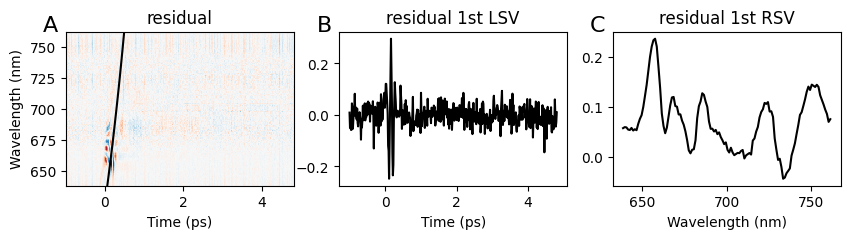

In [98]:
from custom_plotting import plot_residual_and_svd
fig, axes = plot_residual_and_svd(global_result1.data["670TR1"])
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[2].annotate("C", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)


## Plot result for interpretation


Text(-0.05, 1.02, 'C')

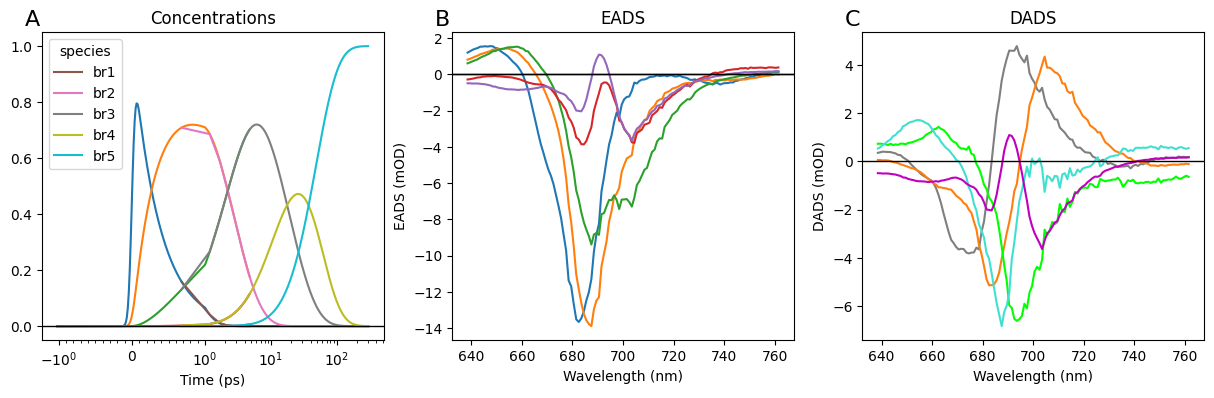

In [99]:
from custom_plotting import plot_concentration_and_spectra


fig, axes = plot_concentration_and_spectra(
    global_result1.data["670TR1"], global_result1.data["670TR2"]
)
axes[0].set_xlabel("Time (ps)")
axes[0].set_ylabel("")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("EADS (mOD)")
axes[1].set_title("EADS")
axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("DADS (mOD)")
axes[2].set_title("DADS")
axes[1].axhline(0, color="k", linewidth=1)
axes[0].annotate("A", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[2].annotate("C", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)


In [100]:
global_scheme = Scheme(
    model="models/global_step2_model_PSI_TA_SCy6803WL670_with_DOAS.yml",  # type: ignore
    parameters=load_parameters(
        "models/global_step2_parameters_PSI_TA_SCy6803WL670_with_DOAS.csv"
    ),
    maximum_number_function_evaluations=15,
    clp_link_tolerance=0.1,
    data={
        # TA data
        "670TR1": DATA_PATH1,
        "670TR2": DATA_PATH2,
    },  # type: ignore
)
global_scheme.validate()


Your model is valid.

In [101]:
global_result670 = optimize(global_scheme, raise_exception=True)


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0270e+02                                    1.79e+01    
       1              2         3.0164e+02      1.06e+00       4.41e-01       1.37e+01    
       2              3         3.0146e+02      1.80e-01       3.00e-01       8.90e+00    
       3              4         3.0141e+02      4.48e-02       2.33e-01       8.46e+00    
       4              5         3.0139e+02      1.91e-02       1.86e-01       7.21e+00    
       5              6         3.0138e+02      9.48e-03       1.42e-01       5.86e+00    
       6              7         3.0138e+02      4.97e-03       1.07e-01       4.60e+00    
       7              8         3.0138e+02      2.64e-03       7.98e-02       3.52e+00    
       8              9         3.0137e+02      1.40e-03       5.94e-02       2.65e+00    
       9             10         3.0137e+02      7.44e-04       4.39e-02       1.98e+00    

## Residual analysis of the 670 nm excitation TR1 data

Text(-0.1, 1, 'C')

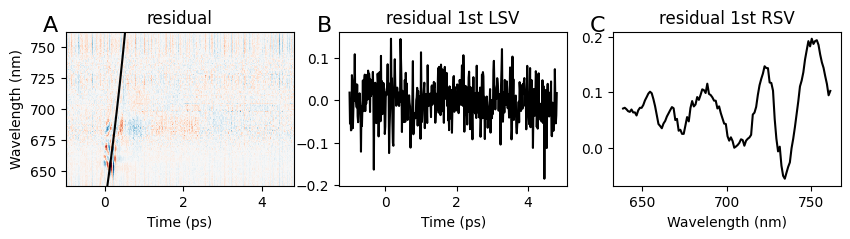

In [102]:
from custom_plotting import plot_residual_and_svd
fig, axes = plot_residual_and_svd(global_result670.data["670TR1"])
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[2].annotate("C", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)


## Plot result for interpretation


Text(-0.05, 1.02, 'C')

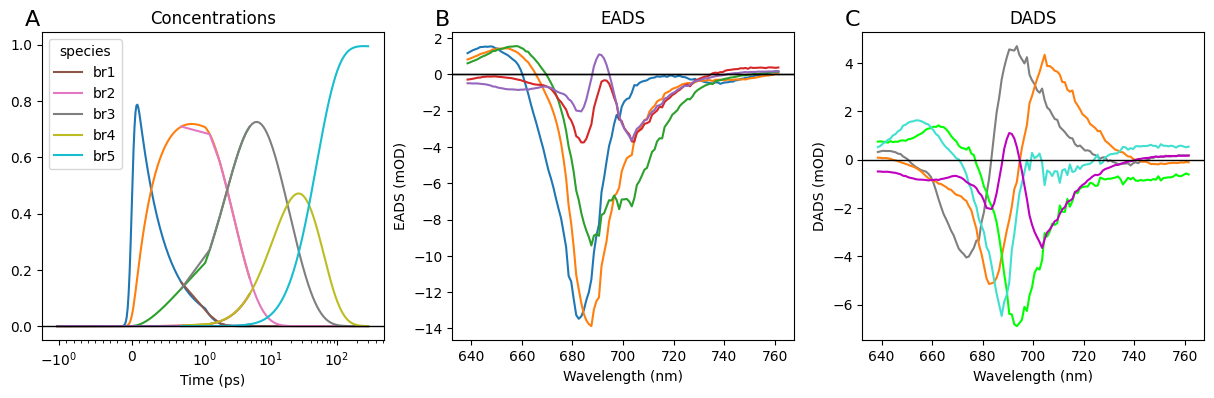

In [103]:
fig, axes = plot_concentration_and_spectra(
    global_result670.data["670TR1"], global_result670.data["670TR2"]
)
axes[0].set_xlabel("Time (ps)")
axes[0].set_ylabel("")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("EADS (mOD)")
axes[1].set_title("EADS")
axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("DADS (mOD)")
axes[2].set_title("DADS")
axes[1].axhline(0, color="k", linewidth=1)
axes[0].annotate("A", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[2].annotate("C", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)


To save the results of the optimization we can use the `save_result` command.

Because it saves *everything* it consumes about 50MB of disk space per save.

In [104]:
save_result(
    result=global_result670,
    result_path="results/global670/result.yaml",
    allow_overwrite=True,
)


['results/global670/result.md',
 'results/global670/initial_parameters.csv',
 'results/global670/optimized_parameters.csv',
 'results/global670/parameter_history.csv',
 'results/global670/optimization_history.csv',
 'results/global670/670TR1.nc',
 'results/global670/670TR2.nc',
 'results/global670/model.yml',
 'results/global670/scheme.yml',
 'results/global670/result.yaml']

### Results and parameters

In [105]:
# Just call the result to get the optimization result summary.
global_result670
# For easier copy-and-paste try:
# print(global_result)


| Optimization Result                       |          |
|-------------------------------------------|----------|
| Number of residual evaluation             | 15       |
| Number of residuals                       | 128340   |
| Number of free parameters                 | 11       |
| Number of conditionally linear parameters | 1240     |
| Degrees of freedom                        | 127089   |
| Chi Square                                | 6.03e+02 |
| Reduced Chi Square                        | 4.74e-03 |
| Root Mean Square Error (RMSE)             | 6.89e-02 |

| RMSE (per dataset)   |   weighted |   unweighted |
|----------------------|------------|--------------|
| 1.670TR1:            |   7.00e-02 |     7.00e-02 |
| 2.670TR2:            |   6.74e-02 |     6.74e-02 |

<br><details>

### Model

#### Dataset Groups

- **default**
  - _Label_: default
  - _Residual Function_: variable_projection
  - _Link Clp_: True


#### K Matrix

- **km670**
  - _Label_: km670
  - _Matrix_: {('br2', 'br1'): 'brates.k21(2.77e+00±1.23e-02, t-value: 225, initial: 2.71e+00)', ('br3', 'br2'): 'brates.k32(4.06e-01±1.74e-03, t-value: 234, initial: 3.85e-01)', ('br4', 'br3'): 'brates.k43(5.64e-02±4.11e-04, t-value: 137, initial: 6.39e-02)', ('br5', 'br4'): 'brates.k54(3.21e-02±2.49e-04, t-value: 129, initial: 3.78e-02)', ('br5', 'br5'): 'brates.k55(2.00e-05, fixed)'}


#### Megacomplex

- **complex670**
  - _Label_: complex670
  - _Dimension_: time
  - _Type_: decay
  - _K Matrix_: ['km670']

- **doas**
  - _Label_: doas
  - _Dimension_: time
  - _Type_: damped-oscillation
  - _Labels_: ['osc1']
  - _Frequencies_: ['osc.freq.1(1.05e+02±1.04e+00, t-value: 101, initial: 1.04e+02)']
  - _Rates_: ['osc.rates.1(-2.15e+01±6.62e-01, t-value: -33, initial: -2.14e+01)']

- **artifact670**
  - _Label_: artifact670
  - _Dimension_: time
  - _Type_: coherent-artifact
  - _Order_: 3
  - _Width_: artifact.CAwidth(5.00e-02±1.86e-04, t-value: 269, initial: 4.97e-02)


#### Initial Concentration

- **input670**
  - _Label_: input670
  - _Compartments_: ['br1', 'br2', 'br3', 'br4', 'br5']
  - _Parameters_: ['input.1(1.00e+00, fixed)', 'input.0(0.00e+00, fixed)', 'input.0(0.00e+00, fixed)', 'input.0(0.00e+00, fixed)', 'input.0(0.00e+00, fixed)']
  - _Exclude From Normalize_: []


#### Irf

- **irf1**
  - _Label_: irf1
  - _Normalize_: True
  - _Backsweep_: False
  - _Dispersion Center_: irf.dispcenter(7.00e+02, fixed)
  - _Center Dispersion Coefficients_: ['irf.disp1(-1.77e+00±6.92e-03, t-value: -257, initial: -1.91e+00)']
  - _Width Dispersion Coefficients_: []
  - _Model Dispersion With Wavenumber_: True
  - _Type_: spectral-gaussian
  - _Center_: irf.center1(3.10e-01±6.88e-04, t-value: 450, initial: 3.21e-01)
  - _Width_: irf.width1(3.97e-02±4.47e-04, t-value: 89, initial: 4.01e-02)


#### Dataset

- **670TR1**
  - _Label_: 670TR1
  - _Group_: default
  - _Force Index Dependent_: False
  - _Megacomplex_: ['complex670', 'doas', 'artifact670']
  - _Scale_: scale.670(1.00e+00, fixed)
  - _Initial Concentration_: input670
  - _Irf_: irf1

- **670TR2**
  - _Label_: 670TR2
  - _Group_: default
  - _Force Index Dependent_: False
  - _Megacomplex_: ['complex670']
  - _Scale_: scale.670TR2(9.88e-01±4.45e-04, t-value: 2221, initial: 9.88e-01)
  - _Initial Concentration_: input670
  - _Irf_: irf1



</section></section></details><section><section>

In [106]:
# Access the result's `optimized_parameters` to print a markdown table of the optimized parameters:
global_result670.optimized_parameters


  * __artifact__:

    | _Label_   |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    | CAwidth   | 4.997e-02 |          1.858e-04 |  269        |   0.000e+00 |         inf | True     | False            | `None`         |

  * __brates__:

    | _Label_   |   _Value_ |   _Standard Error_ | _t-value_   |    _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|--------------|-------------|----------|------------------|----------------|
    | k21       | 2.770e+00 |          1.229e-02 |  225        |    0.000e+00 |         inf | True     | False            | `None`         |
    | k32       | 4.056e-01 |          1.737e-03 |  234        |    0.000e+00 |         inf | True     | False            | `None`         |
    | k43       | 5.636e-02 |          4.114e-04 |  137        |    0.000e+00 |         inf | True     | False            | `None`         |
    | k54       | 3.215e-02 |          2.486e-04 |  129        |    0.000e+00 |         inf | True     | False            | `None`         |
    | k55       | 2.000e-05 |        nan         |  nan        | -inf         |         inf | False    | False            | `None`         |

  * __input__:

    |   _Label_ |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    |         1 | 1.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |
    |         0 | 0.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |

  * __irf__:

    | _Label_    |    _Value_ |   _Standard Error_ | _t-value_   |    _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |------------|------------|--------------------|-------------|--------------|-------------|----------|------------------|----------------|
    | center1    |  3.097e-01 |          6.884e-04 |  450        |    0.000e+00 |         inf | True     | False            | `None`         |
    | width1     |  3.968e-02 |          4.472e-04 |  89         |    0.000e+00 |         inf | True     | False            | `None`         |
    | disp1      | -1.775e+00 |          6.917e-03 |  -257       | -inf         |         inf | True     | False            | `None`         |
    | dispcenter |  7.000e+02 |        nan         |  nan        | -inf         |         inf | False    | False            | `None`         |

  * __osc__:
    * __freq__:

      |   _Label_ |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
      |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
      |         1 | 1.052e+02 |          1.044e+00 |  101        |        -inf |         inf | True     | False            | `None`         |

    * __rates__:

      |   _Label_ |    _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
      |-----------|------------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
      |         1 | -2.152e+01 |          6.619e-01 |  -33        |        -inf |         inf | True     | False            | `None`         |

  * __scale__:

    | _Label_   |   _Value_ |   _Standard Error_ | _t-value_   |    _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|--------------|-------------|----------|------------------|----------------|
    | 670       | 1.000e+00 |        nan         |  nan        | -inf         |         inf | False    | False            | `None`         |
    | 670TR2    | 9.885e-01 |          4.450e-04 |  2221       |    0.000e+00 |         inf | True     | False            | `None`         |



## what to do if the estimated rate constants are not in decreasing order?
then one should sort the estimated rate constants in decreasing order, and repeat the fit with those new starting values

### Amplitude matrices

In [107]:
show_a_matrixes(global_result670)


### A-Matrixes

<details >
<summary>
<h4 style="display:inline;">
670TR1
</h4>
</summary>

##### complex670:

<table>
<thead>
<tr><th>species<br>initial concentration<br>lifetime↓  </th><th>br1<br>1<br>&nbsp;  </th><th>br2<br>0<br>&nbsp;  </th><th>br3<br>0<br>&nbsp;  </th><th>br4<br>0<br>&nbsp;  </th><th>br5<br>0<br>&nbsp;  </th><th>Sum       </th></tr>
</thead>
<tbody>
<tr><td>0.361                                          </td><td>1                   </td><td>-1.172              </td><td>0.175               </td><td>-0.004              </td><td>4.186e-05           </td><td>3.023e-10 </td></tr>
<tr><td>2.465                                          </td><td>                    </td><td>1.172               </td><td>-1.361              </td><td>0.205               </td><td>-0.016              </td><td>-8.025e-07</td></tr>
<tr><td>17.742                                         </td><td>                    </td><td>                    </td><td>1.186               </td><td>-2.759              </td><td>1.574               </td><td>5.587e-04 </td></tr>
<tr><td>31.106                                         </td><td>                    </td><td>                    </td><td>                    </td><td>2.558               </td><td>-2.559              </td><td>-0.002    </td></tr>
<tr><td>50000                                          </td><td>                    </td><td>                    </td><td>                    </td><td>                    </td><td>1.001               </td><td>1.001     </td></tr>
<tr><td>Sum                                            </td><td>1                   </td><td>                    </td><td>                    </td><td>-4.441e-16          </td><td>4.441e-16           </td><td>1.000     </td></tr>
</tbody>
</table>
<br>
</details>
<details >
<summary>
<h4 style="display:inline;">
670TR2
</h4>
</summary>

##### complex670:

<table>
<thead>
<tr><th>species<br>initial concentration<br>lifetime↓  </th><th>br1<br>1<br>&nbsp;  </th><th>br2<br>0<br>&nbsp;  </th><th>br3<br>0<br>&nbsp;  </th><th>br4<br>0<br>&nbsp;  </th><th>br5<br>0<br>&nbsp;  </th><th>Sum       </th></tr>
</thead>
<tbody>
<tr><td>0.361                                          </td><td>1                   </td><td>-1.172              </td><td>0.175               </td><td>-0.004              </td><td>4.186e-05           </td><td>3.023e-10 </td></tr>
<tr><td>2.465                                          </td><td>                    </td><td>1.172               </td><td>-1.361              </td><td>0.205               </td><td>-0.016              </td><td>-8.025e-07</td></tr>
<tr><td>17.742                                         </td><td>                    </td><td>                    </td><td>1.186               </td><td>-2.759              </td><td>1.574               </td><td>5.587e-04 </td></tr>
<tr><td>31.106                                         </td><td>                    </td><td>                    </td><td>                    </td><td>2.558               </td><td>-2.559              </td><td>-0.002    </td></tr>
<tr><td>50000                                          </td><td>                    </td><td>                    </td><td>                    </td><td>                    </td><td>1.001               </td><td>1.001     </td></tr>
<tr><td>Sum                                            </td><td>1                   </td><td>                    </td><td>                    </td><td>-4.441e-16          </td><td>4.441e-16           </td><td>1.000     </td></tr>
</tbody>
</table>
<br>
</details>

## Result plots

<sub>Note: The color scheme of the plots in this notebook may not match published figures.</sub>

## Fit quality

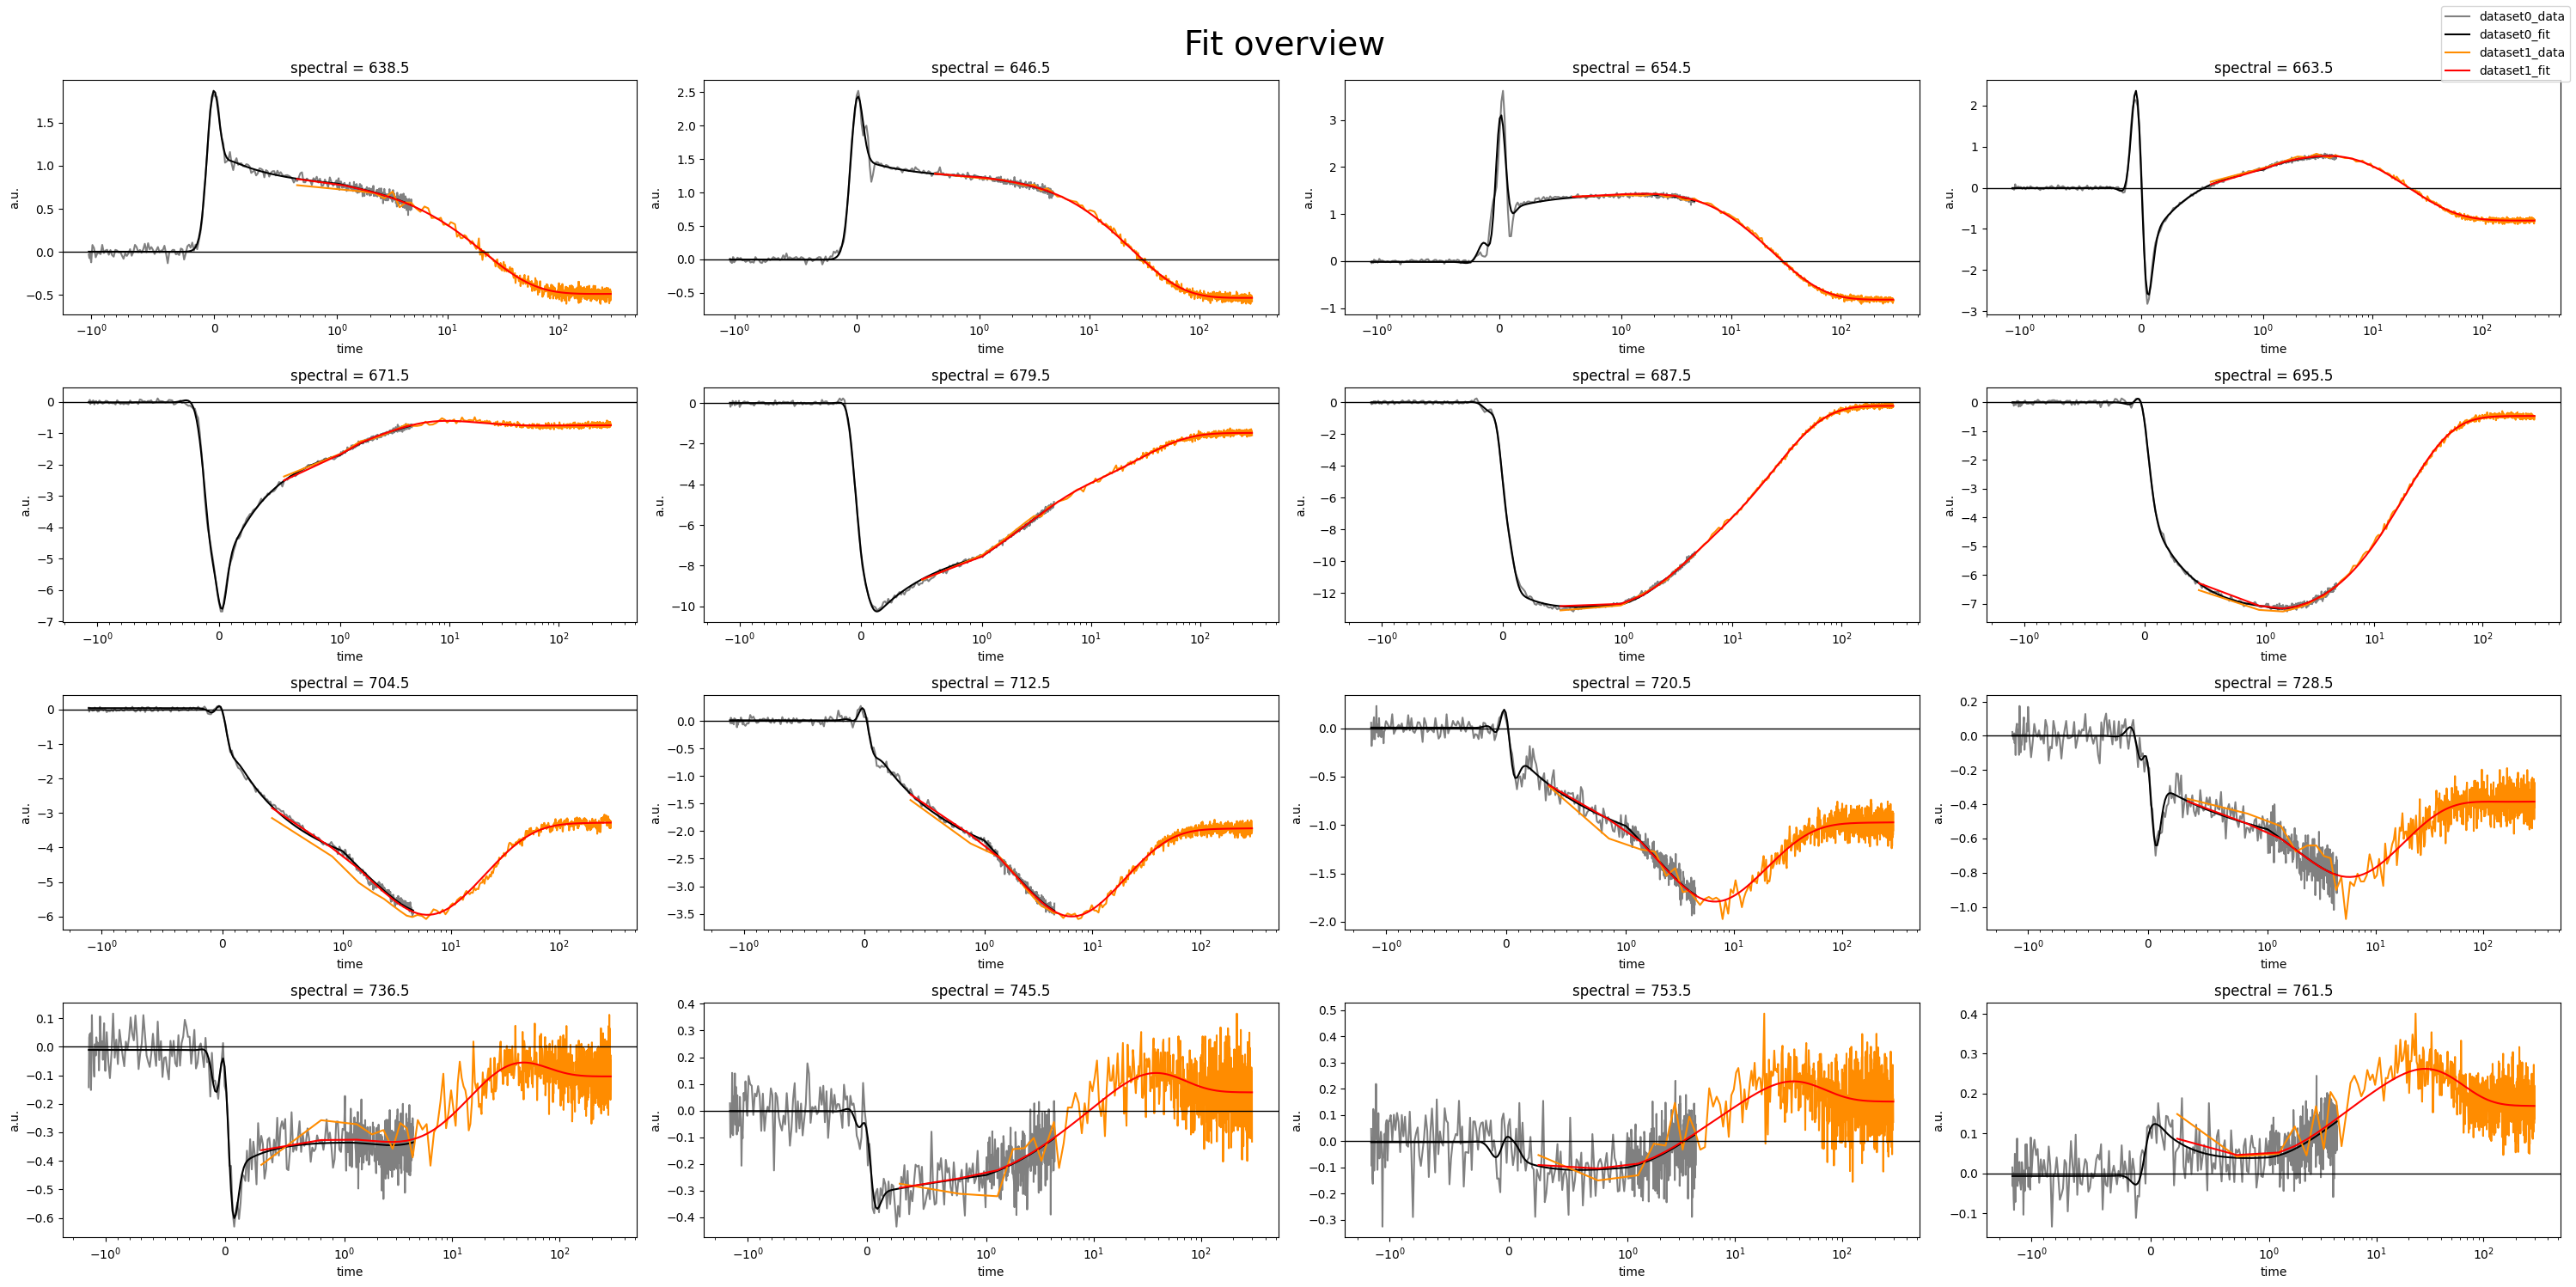

In [108]:
global_result_TA = (
    global_result670.data["670TR1"],
    global_result670.data["670TR2"],
)
wavelengths = select_plot_wavelengths(global_result_TA, equidistant_wavelengths=True)
fig_traces = plot_fitted_traces(global_result_TA, wavelengths, linlog=True, linthresh=1)


The above command `plot_fitted_traces` is used to plot a selection of traces for a set of wavelengths (autogenerated using the `select_plot_wavelengths` function).

## Overview 670 exc

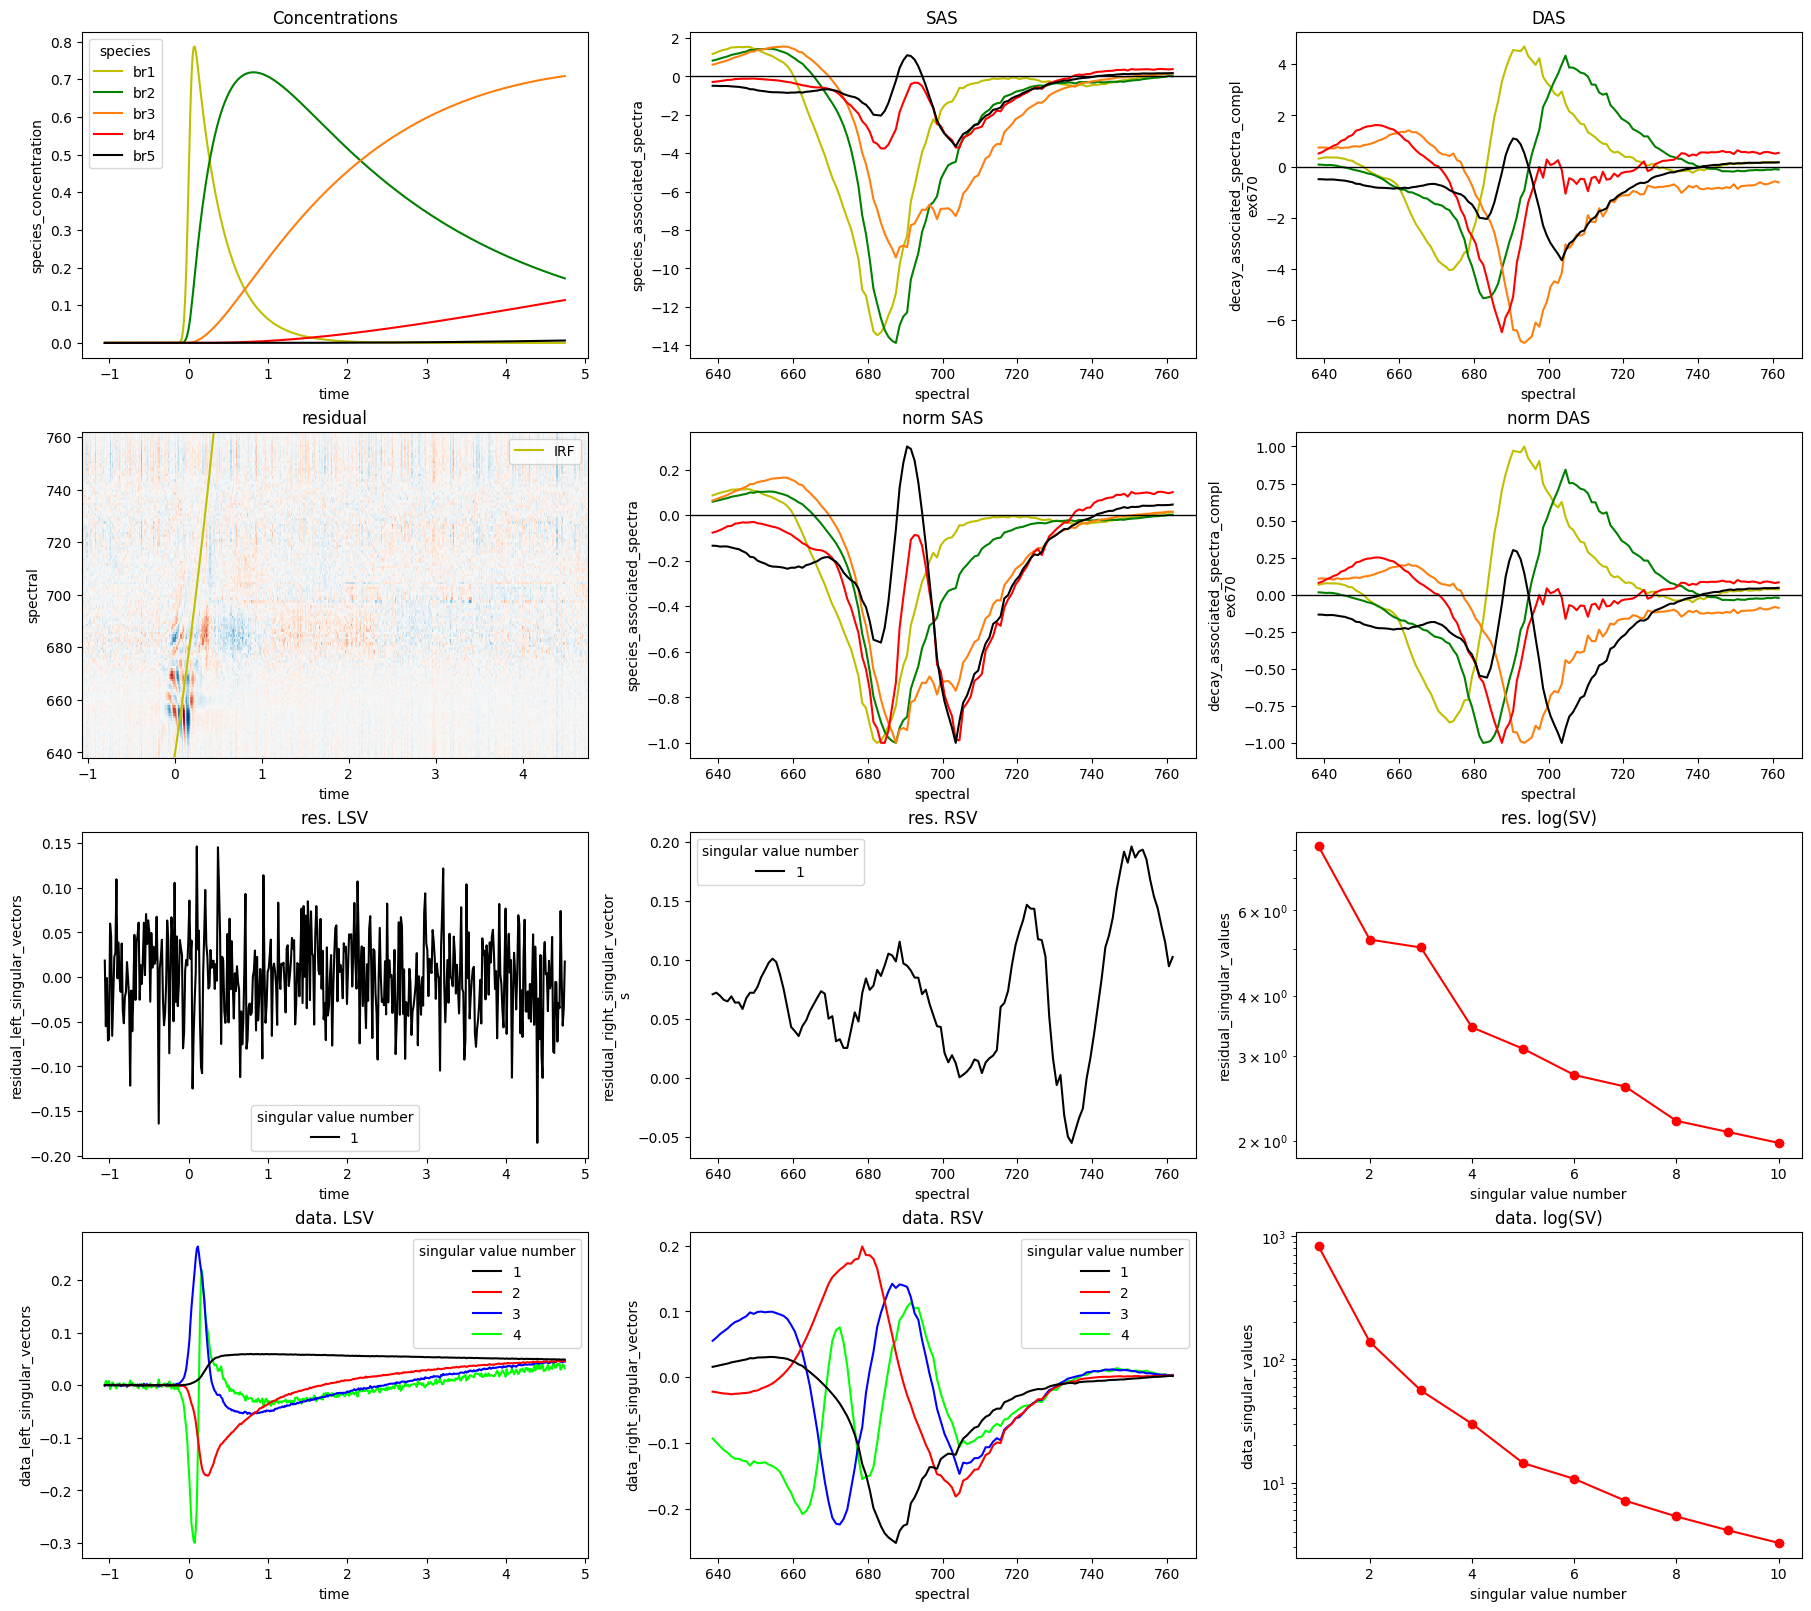

In [109]:
fig_670TR1 = plot_overview(
    global_result670.data["670TR1"],
    nr_of_data_svd_vectors=4,
    nr_of_residual_svd_vectors=1,
    linlog=False,
    linthresh=1,
    cycler=cycler(
        color=["y", "g", "tab:orange", "r", "k", "c", "b", "m", "tab:purple"]
    ),
    use_svd_number=True,
    svd_cycler=PlotStyle().cycler,
)


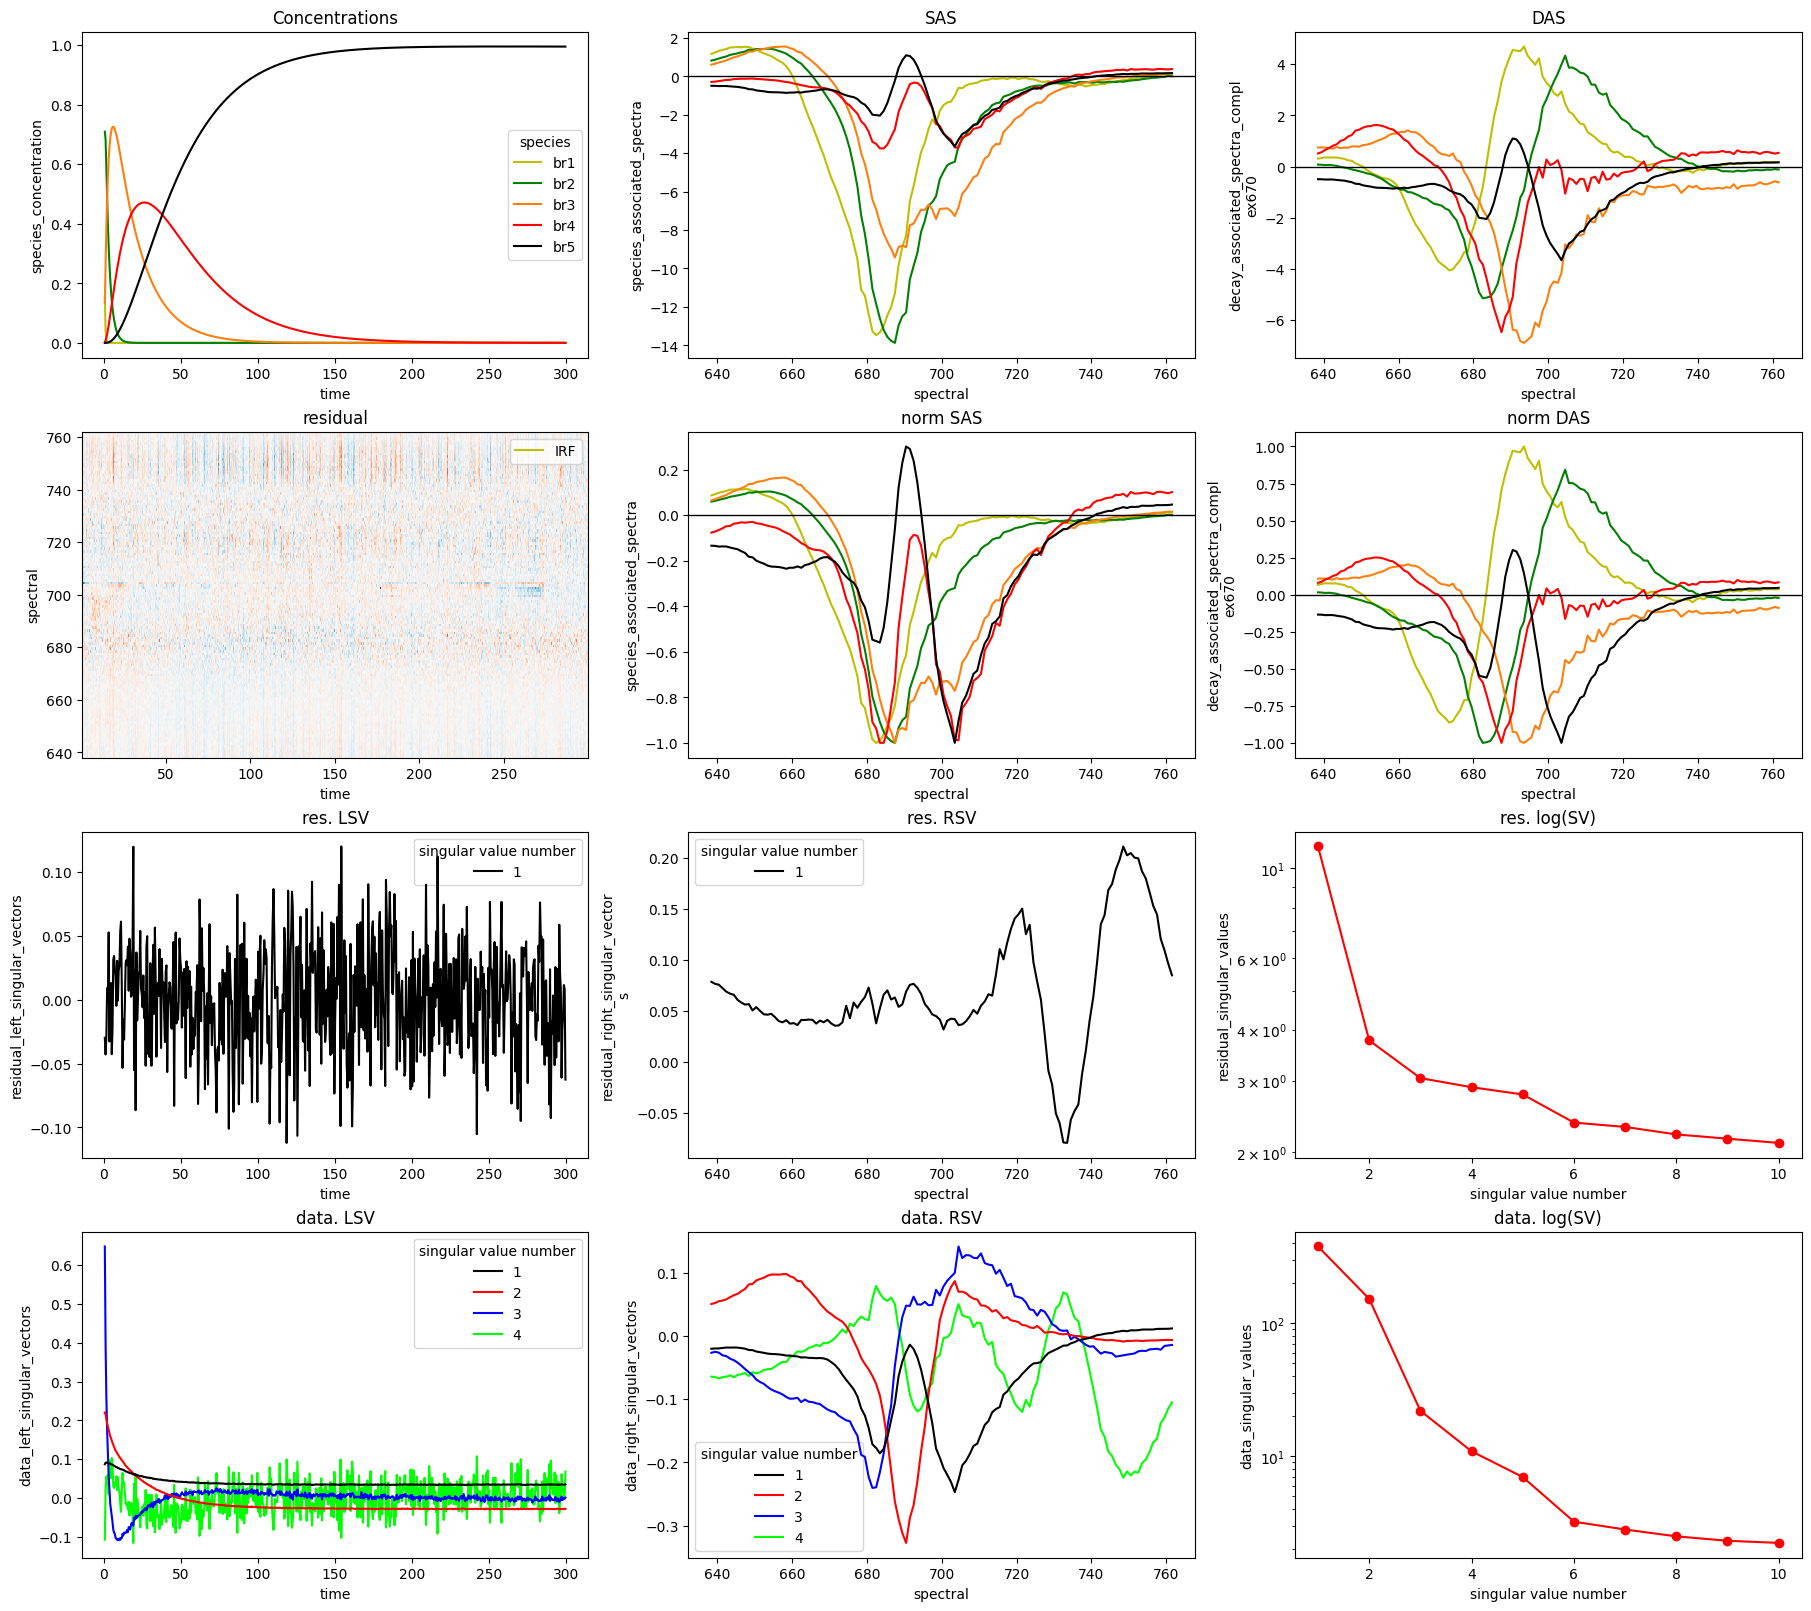

In [110]:
fig_670TR2 = plot_overview(
    global_result670.data["670TR2"],
    nr_of_data_svd_vectors=4,
    nr_of_residual_svd_vectors=1,
    linlog=False,
    linthresh=1,
    cycler=cycler(
        color=["y", "g", "tab:orange", "r", "k", "c", "b", "m", "tab:purple"]
    ),
    use_svd_number=True,
    svd_cycler=PlotStyle().cycler,
)


## Coherent Artifact


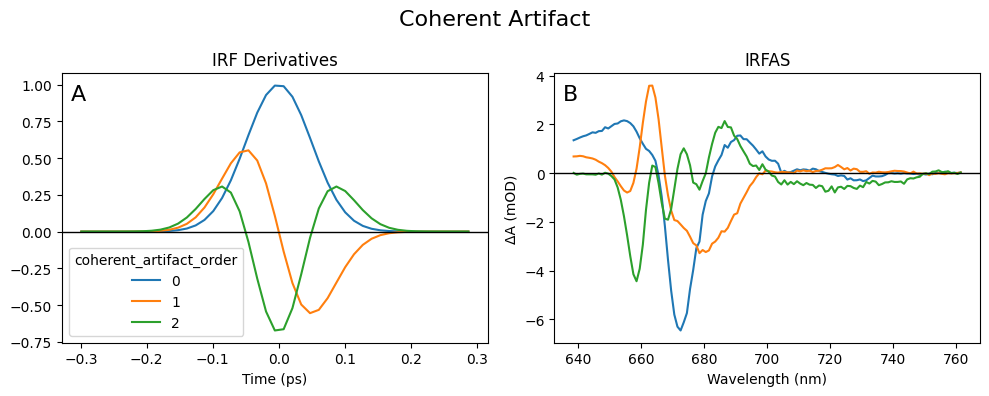

In [111]:
from pyglotaran_extras import plot_coherent_artifact

fig, axes = plot_coherent_artifact(
    global_result670.data["670TR1"], time_range=(-0.3, 0.3), figsize=(10, 4)
)
axes[0].set_xlabel("Time (ps)")
axes[1].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("")
axes[0].annotate("A", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=16)
fig.tight_layout()


## Overview of the estimated DOAS and phases of 670 nm excitation data

Text(0.01, 0.89, 'E')

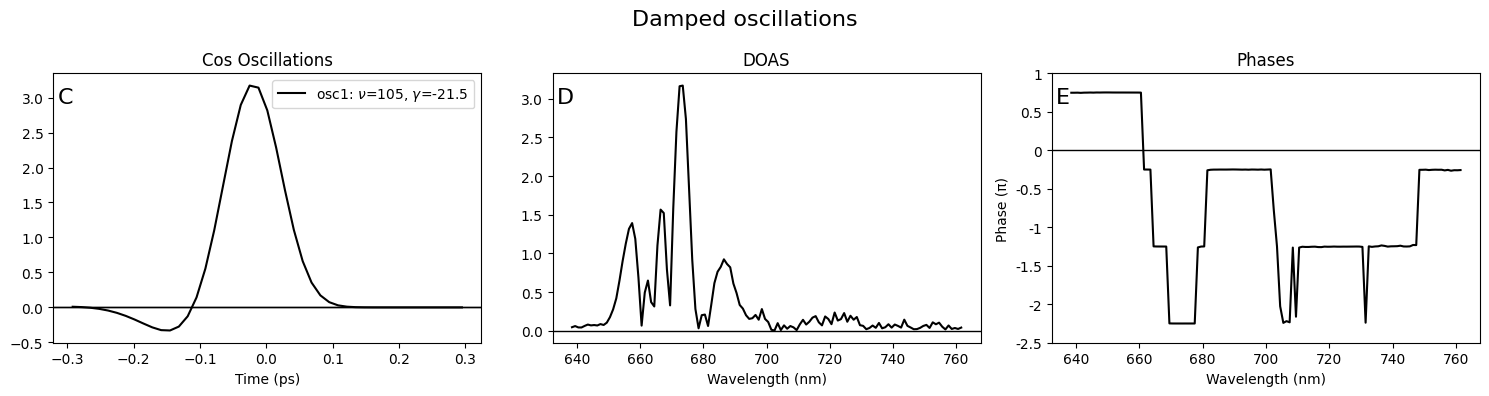

In [112]:
from pyglotaran_extras import plot_doas
from pyglotaran_extras.plotting.style import ColorCode

fig, axes = plot_doas(
    global_result670.data["670TR1"],
    damped_oscillation=["osc1"],
    time_range=(-0.3, 0.3),
    spectral=700,
    figsize=(15, 4),
    normalize=False,
    # oscillation_type="sin",
    # center_λ=550,
)

axes[0].set_xlabel("Time (ps)")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[2].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("")
axes[1].set_title("DOAS")
# axes[0].annotate("A", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
# axes[1].annotate("B", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
# axes[2].annotate("C", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
axes[0].annotate("C", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
axes[1].annotate("D", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
axes[2].annotate("E", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)


# Step 2b Global analysis of 700nm excitation TA of WL-PSI of SCy6803

### Inspect data

In [113]:
from cycler import cycler
from glotaran.io import load_parameters, save_result
from glotaran.optimization.optimize import optimize
from glotaran.project.scheme import Scheme
from pyglotaran_extras.plotting.plot_overview import plot_overview
from pyglotaran_extras.plotting.plot_traces import (
    plot_fitted_traces,
    select_plot_wavelengths,
)
from pyglotaran_extras.inspect import show_a_matrixes


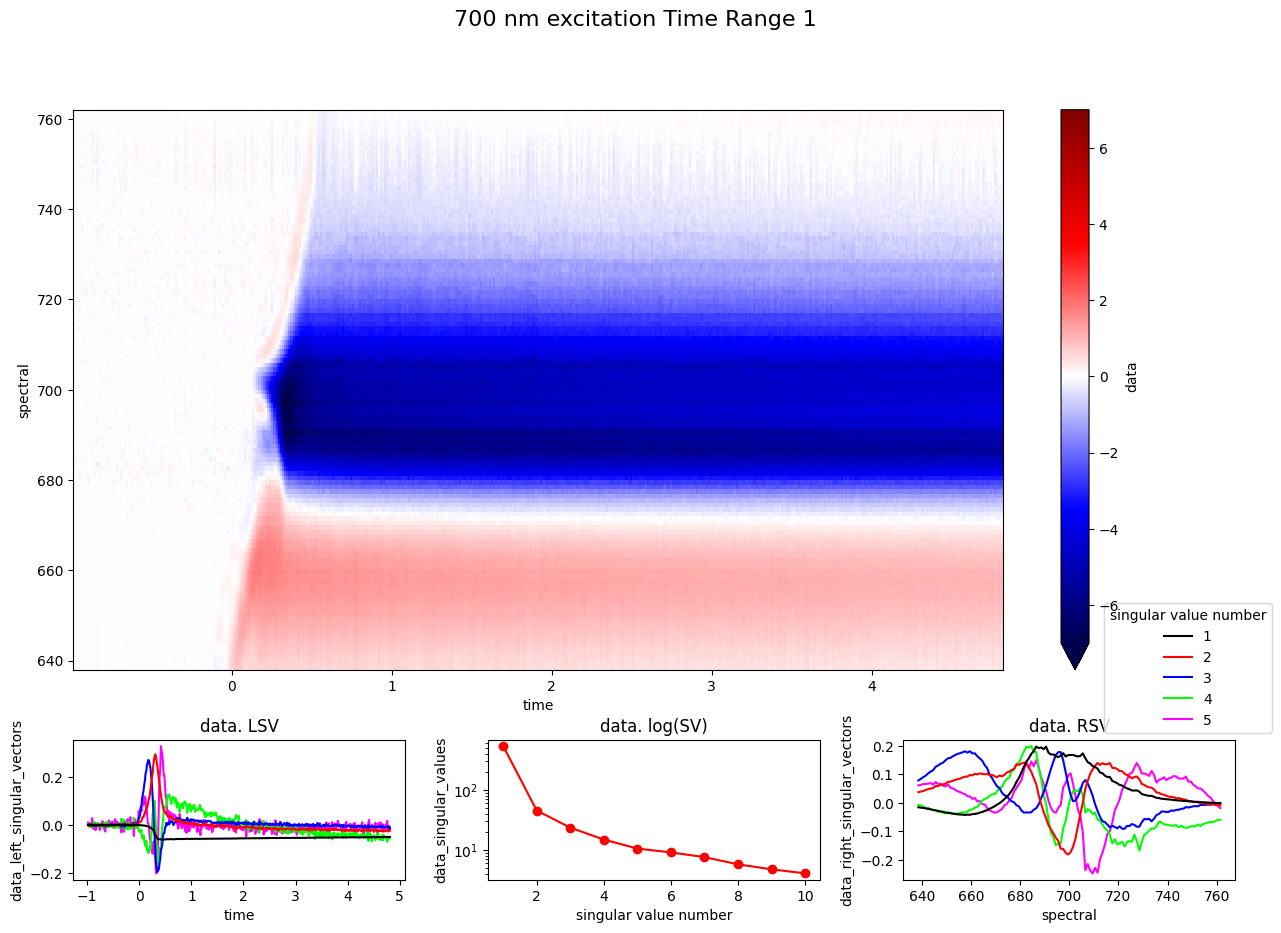

In [114]:
from pyglotaran_extras import plot_data_overview

DATA_PATH3 = "data/SCy6803WL/synWTred670_700nm_exc2RPnocycle1nm_revc.ascii"
DATA_PATH4 = "data/SCy6803WL/synWTred670_700nm_exc2RPnocycle1nm_revd.ascii"
fig, axes = plot_data_overview(
    DATA_PATH3,
    nr_of_data_svd_vectors=5,
    linlog=False,
    cmap="seismic",
    vmin=-7,
    vmax=7,
    use_svd_number=True,
    title="700 nm excitation Time Range 1",
)
# change color map seismic or bwr
# axes[0].set_cmap('seismic')


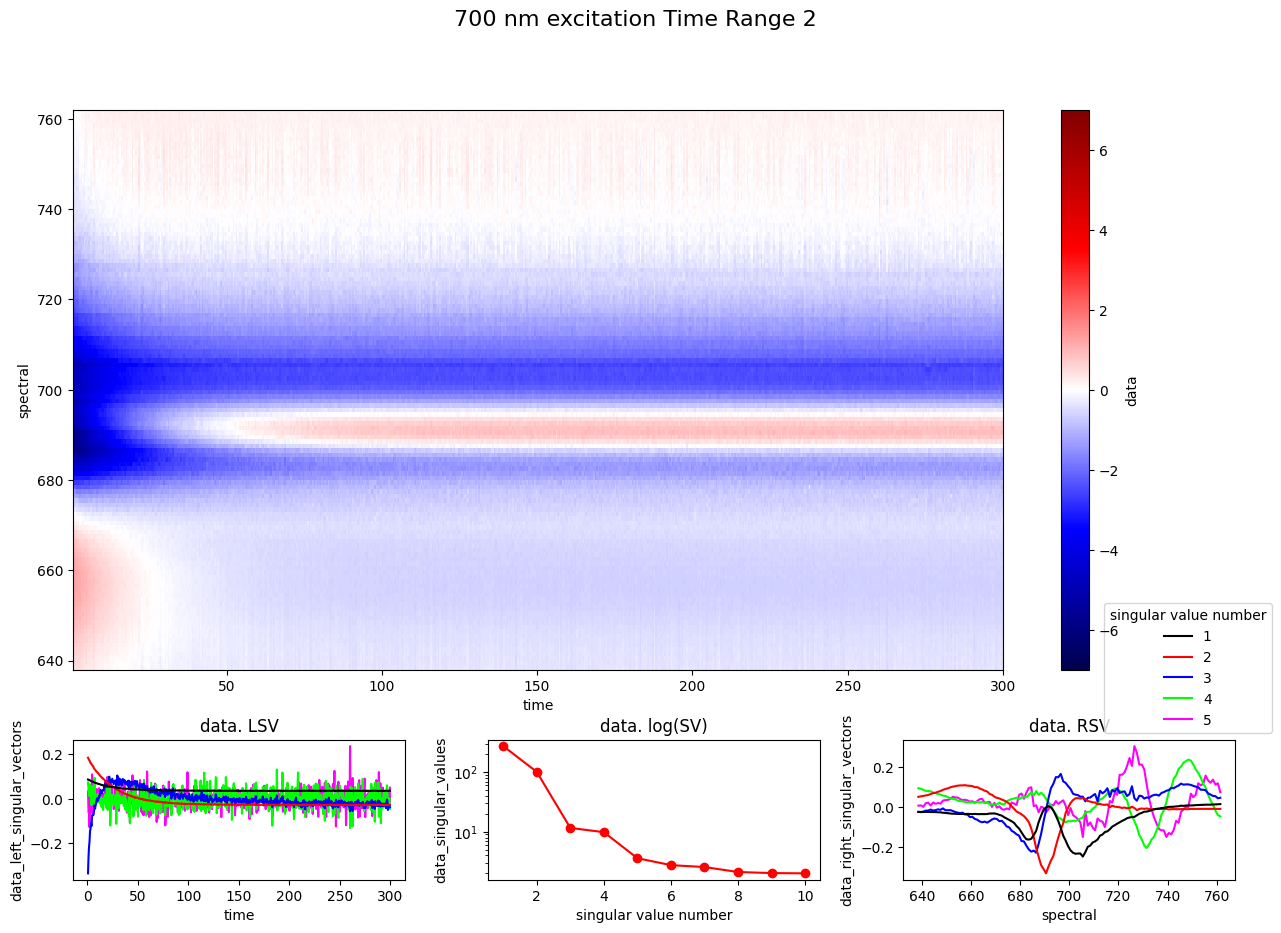

In [115]:
fig, axes = plot_data_overview(
    DATA_PATH4,
    nr_of_data_svd_vectors=5,
    linlog=False,
    linthresh=10,
    cmap="seismic",
    vmin=-7,
    vmax=7,
    use_svd_number=True,
    title="700 nm excitation Time Range 2",
)


## Global Analysis

### Used model and parameters

In [116]:
global_model_path = "models/global_step3_model_PSI_TA_SCy6803WL700.yml"


In [117]:
global_parameters_path = "models/global_step3_parameters_PSI_TA_SCy6803WL700.csv"
optimized_parameters = load_parameters(global_parameters_path)


#### Model file

In [118]:
# Uncomment the following 2 lines to display the global model file in the notebook
# from glotaran.utils.ipython import display_file
# display_file(global_model_path, syntax="yaml")

# Alternatively (recommended), open the file in a text editor to see the model definition


#### Parameters file

In [119]:
# Uncomment the next line and run the cell to print the starting values of the analysis
# These starting values have already been optimized, hence the name optimized_parameters

# optimized_parameters


### Create scheme and optimize it

In [120]:
global_scheme = Scheme(
    model=global_model_path,  # type: ignore
    parameters=optimized_parameters,
    maximum_number_function_evaluations=15,
    clp_link_tolerance=0.1,
    data={
        # TA data
        # "670TR1": DATA_PATH1,
        # "670TR2": DATA_PATH2,
        "700TR1": DATA_PATH3,
        "700TR2": DATA_PATH4,
    },  # type: ignore
)
global_scheme.validate()


Your model is valid.

In [121]:
global_result = optimize(global_scheme, raise_exception=True)


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.8122e+02                                    7.85e+03    
       1              2         2.7480e+02      6.42e+00       3.94e-01       3.69e+02    
       2              3         2.7352e+02      1.28e+00       2.03e-01       1.52e+02    
       3              4         2.7263e+02      8.87e-01       1.24e-01       7.40e+01    
       4              5         2.7224e+02      3.94e-01       7.72e-02       2.69e+00    
       5              6         2.7218e+02      5.32e-02       2.47e-02       4.66e+00    
       6              7         2.7216e+02      1.85e-02       1.22e-02       4.04e+00    
       7              8         2.7216e+02      9.48e-03       8.37e-03       3.14e+00    
       8              9         2.7215e+02      5.32e-03       6.20e-03       2.42e+00    
       9             10         2.7215e+02      3.11e-03       4.71e-03       1.88e+00    

To save the results of the optimization we can use the `save_result` command.

Because it saves *everything* it consumes about 50MB of disk space per save.

In [122]:
global_result700 = global_result


In [123]:
save_result(
    result=global_result,
    result_path="results/global700/result.yaml",
    allow_overwrite=True,
)


['results/global700/result.md',
 'results/global700/initial_parameters.csv',
 'results/global700/optimized_parameters.csv',
 'results/global700/parameter_history.csv',
 'results/global700/optimization_history.csv',
 'results/global700/700TR1.nc',
 'results/global700/700TR2.nc',
 'results/global700/model.yml',
 'results/global700/scheme.yml',
 'results/global700/result.yaml']

### Results and parameters

In [124]:
# Just call the result to get the optimization result summary.
global_result
# For easier copy-and-paste try:
# print(global_result)


| Optimization Result                       |          |
|-------------------------------------------|----------|
| Number of residual evaluation             | 15       |
| Number of residuals                       | 128340   |
| Number of free parameters                 | 8        |
| Number of conditionally linear parameters | 868      |
| Degrees of freedom                        | 127464   |
| Chi Square                                | 5.44e+02 |
| Reduced Chi Square                        | 4.27e-03 |
| Root Mean Square Error (RMSE)             | 6.53e-02 |

| RMSE (per dataset)   |   weighted |   unweighted |
|----------------------|------------|--------------|
| 1.700TR1:            |   6.74e-02 |     6.74e-02 |
| 2.700TR2:            |   6.34e-02 |     6.34e-02 |

<br><details>

### Model

#### Dataset Groups

- **default**
  - _Label_: default
  - _Residual Function_: variable_projection
  - _Link Clp_: True


#### K Matrix

- **km700**
  - _Label_: km700
  - _Matrix_: {('r2', 'r1'): 'rates.k21(1.86e+00±2.09e-02, t-value: 89, initial: 1.19e+00)', ('r3', 'r2'): 'rates.k32(7.43e-02±7.25e-04, t-value: 102, initial: 6.45e-02)', ('r4', 'r3'): 'rates.k43(3.80e-02±1.31e-04, t-value: 289, initial: 3.83e-02)', ('r4', 'r4'): 'rates.k44(4.22e-05±4.81e-06, t-value: 8.8, initial: 2.00e-05)'}


#### Megacomplex

- **complex700**
  - _Label_: complex700
  - _Dimension_: time
  - _Type_: decay
  - _K Matrix_: ['km700']

- **artifact700**
  - _Label_: artifact700
  - _Dimension_: time
  - _Type_: coherent-artifact
  - _Order_: 3


#### Initial Concentration

- **input700**
  - _Label_: input700
  - _Compartments_: ['r1', 'r2', 'r3', 'r4']
  - _Parameters_: ['input.1(1.00e+00, fixed)', 'input.0(0.00e+00, fixed)', 'input.0(0.00e+00, fixed)', 'input.0(0.00e+00, fixed)']
  - _Exclude From Normalize_: []


#### Irf

- **irf2**
  - _Label_: irf2
  - _Normalize_: True
  - _Backsweep_: False
  - _Dispersion Center_: irf.dispcenter(7.00e+02, fixed)
  - _Center Dispersion Coefficients_: ['irf.disp1(-1.50e+00±6.20e-03, t-value: -241, initial: -1.91e+00)']
  - _Width Dispersion Coefficients_: []
  - _Model Dispersion With Wavenumber_: True
  - _Type_: spectral-gaussian
  - _Center_: irf.center2(3.03e-01±2.98e-04, t-value: 1016, initial: 2.99e-01)
  - _Width_: irf.width2(5.44e-02±1.42e-04, t-value: 382, initial: 5.25e-02)


#### Dataset

- **700TR1**
  - _Label_: 700TR1
  - _Group_: default
  - _Force Index Dependent_: False
  - _Megacomplex_: ['complex700', 'artifact700']
  - _Scale_: scale.700(7.00e-01, fixed)
  - _Initial Concentration_: input700
  - _Irf_: irf2

- **700TR2**
  - _Label_: 700TR2
  - _Group_: default
  - _Force Index Dependent_: False
  - _Megacomplex_: ['complex700']
  - _Scale_: scale.700TR2(6.93e-01±4.19e-04, t-value: 1655, initial: 6.92e-01)
  - _Initial Concentration_: input700
  - _Irf_: irf2



</section></section></details><section><section>

In [125]:
# Access the result's `optimized_parameters` to print a markdown table of the optimized parameters:
global_result.optimized_parameters


  * __area__:

    |   _Label_ |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    |         1 | 1.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |

  * __input__:

    |   _Label_ |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    |         1 | 1.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |
    |         0 | 0.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |

  * __irf__:

    | _Label_    |    _Value_ |   _Standard Error_ | _t-value_   |    _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |------------|------------|--------------------|-------------|--------------|-------------|----------|------------------|----------------|
    | center2    |  3.028e-01 |          2.980e-04 |  1016       |    0.000e+00 |         inf | True     | False            | `None`         |
    | width2     |  5.436e-02 |          1.421e-04 |  382        |    0.000e+00 |         inf | True     | False            | `None`         |
    | disp1      | -1.496e+00 |          6.198e-03 |  -241       | -inf         |         inf | True     | False            | `None`         |
    | dispcenter |  7.000e+02 |        nan         |  nan        | -inf         |         inf | False    | False            | `None`         |

  * __rates__:

    | _Label_   |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    | k21       | 1.857e+00 |          2.087e-02 |  89         |   0.000e+00 |         inf | True     | False            | `None`         |
    | k32       | 7.429e-02 |          7.253e-04 |  102        |   0.000e+00 |         inf | True     | False            | `None`         |
    | k43       | 3.797e-02 |          1.314e-04 |  289        |   0.000e+00 |         inf | True     | False            | `None`         |
    | k44       | 4.220e-05 |          4.814e-06 |  8.8        |   0.000e+00 |         inf | True     | False            | `None`         |
    | k55       | 1.000e+00 |        nan         |  nan        |   0.000e+00 |         inf | False    | False            | `None`         |

  * __rel__:

    | _Label_   |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    | r1        | 1.000e+00 |                nan |  nan        |        -inf |         inf | False    | False            | `None`         |

  * __scale__:

    | _Label_   |   _Value_ |   _Standard Error_ | _t-value_   |   _Minimum_ |   _Maximum_ | _Vary_   | _Non-Negative_   | _Expression_   |
    |-----------|-----------|--------------------|-------------|-------------|-------------|----------|------------------|----------------|
    | 700       | 7.000e-01 |        nan         |  nan        |   0.000e+00 |         inf | False    | False            | `None`         |
    | 700TR2    | 6.931e-01 |          4.189e-04 |  1655       |   0.000e+00 |         inf | True     | False            | `None`         |



## what to do if the estimated rate constants are not in decreasing order?
then one should sort the estimated rate constants in decreasing order, and repeat the fit with those new starting values

### Amplitude matrices

In [126]:
show_a_matrixes(global_result)


### A-Matrixes

<details >
<summary>
<h4 style="display:inline;">
700TR1
</h4>
</summary>

##### complex700:

<table>
<thead>
<tr><th>species<br>initial concentration<br>lifetime↓  </th><th>r1<br>1<br>&nbsp;  </th><th>r2<br>0<br>&nbsp;  </th><th>r3<br>0<br>&nbsp;  </th><th>r4<br>0<br>&nbsp;  </th><th>Sum       </th></tr>
</thead>
<tbody>
<tr><td>0.539                                          </td><td>1                  </td><td>-1.042             </td><td>0.043              </td><td>-8.700e-04         </td><td>-1.977e-08</td></tr>
<tr><td>13.461                                         </td><td>                   </td><td>1.042              </td><td>-2.131             </td><td>1.090              </td><td>6.188e-04 </td></tr>
<tr><td>26.337                                         </td><td>                   </td><td>                   </td><td>2.088              </td><td>-2.090             </td><td>-0.002    </td></tr>
<tr><td>23699                                          </td><td>                   </td><td>                   </td><td>                   </td><td>1.002              </td><td>1.002     </td></tr>
<tr><td>Sum                                            </td><td>1                  </td><td>                   </td><td>                   </td><td>4.441e-16          </td><td>1.000     </td></tr>
</tbody>
</table>
<br>
</details>
<details >
<summary>
<h4 style="display:inline;">
700TR2
</h4>
</summary>

##### complex700:

<table>
<thead>
<tr><th>species<br>initial concentration<br>lifetime↓  </th><th>r1<br>1<br>&nbsp;  </th><th>r2<br>0<br>&nbsp;  </th><th>r3<br>0<br>&nbsp;  </th><th>r4<br>0<br>&nbsp;  </th><th>Sum       </th></tr>
</thead>
<tbody>
<tr><td>0.539                                          </td><td>1                  </td><td>-1.042             </td><td>0.043              </td><td>-8.700e-04         </td><td>-1.977e-08</td></tr>
<tr><td>13.461                                         </td><td>                   </td><td>1.042              </td><td>-2.131             </td><td>1.090              </td><td>6.188e-04 </td></tr>
<tr><td>26.337                                         </td><td>                   </td><td>                   </td><td>2.088              </td><td>-2.090             </td><td>-0.002    </td></tr>
<tr><td>23699                                          </td><td>                   </td><td>                   </td><td>                   </td><td>1.002              </td><td>1.002     </td></tr>
<tr><td>Sum                                            </td><td>1                  </td><td>                   </td><td>                   </td><td>4.441e-16          </td><td>1.000     </td></tr>
</tbody>
</table>
<br>
</details>

### Amplitude matrices

In [127]:
show_a_matrixes(global_result)


### A-Matrixes

<details >
<summary>
<h4 style="display:inline;">
700TR1
</h4>
</summary>

##### complex700:

<table>
<thead>
<tr><th>species<br>initial concentration<br>lifetime↓  </th><th>r1<br>1<br>&nbsp;  </th><th>r2<br>0<br>&nbsp;  </th><th>r3<br>0<br>&nbsp;  </th><th>r4<br>0<br>&nbsp;  </th><th>Sum       </th></tr>
</thead>
<tbody>
<tr><td>0.539                                          </td><td>1                  </td><td>-1.042             </td><td>0.043              </td><td>-8.700e-04         </td><td>-1.977e-08</td></tr>
<tr><td>13.461                                         </td><td>                   </td><td>1.042              </td><td>-2.131             </td><td>1.090              </td><td>6.188e-04 </td></tr>
<tr><td>26.337                                         </td><td>                   </td><td>                   </td><td>2.088              </td><td>-2.090             </td><td>-0.002    </td></tr>
<tr><td>23699                                          </td><td>                   </td><td>                   </td><td>                   </td><td>1.002              </td><td>1.002     </td></tr>
<tr><td>Sum                                            </td><td>1                  </td><td>                   </td><td>                   </td><td>4.441e-16          </td><td>1.000     </td></tr>
</tbody>
</table>
<br>
</details>
<details >
<summary>
<h4 style="display:inline;">
700TR2
</h4>
</summary>

##### complex700:

<table>
<thead>
<tr><th>species<br>initial concentration<br>lifetime↓  </th><th>r1<br>1<br>&nbsp;  </th><th>r2<br>0<br>&nbsp;  </th><th>r3<br>0<br>&nbsp;  </th><th>r4<br>0<br>&nbsp;  </th><th>Sum       </th></tr>
</thead>
<tbody>
<tr><td>0.539                                          </td><td>1                  </td><td>-1.042             </td><td>0.043              </td><td>-8.700e-04         </td><td>-1.977e-08</td></tr>
<tr><td>13.461                                         </td><td>                   </td><td>1.042              </td><td>-2.131             </td><td>1.090              </td><td>6.188e-04 </td></tr>
<tr><td>26.337                                         </td><td>                   </td><td>                   </td><td>2.088              </td><td>-2.090             </td><td>-0.002    </td></tr>
<tr><td>23699                                          </td><td>                   </td><td>                   </td><td>                   </td><td>1.002              </td><td>1.002     </td></tr>
<tr><td>Sum                                            </td><td>1                  </td><td>                   </td><td>                   </td><td>4.441e-16          </td><td>1.000     </td></tr>
</tbody>
</table>
<br>
</details>

## Result plots

<sub>Note: The color scheme of the plots in this notebook may not match published figures.</sub>

## Fit quality

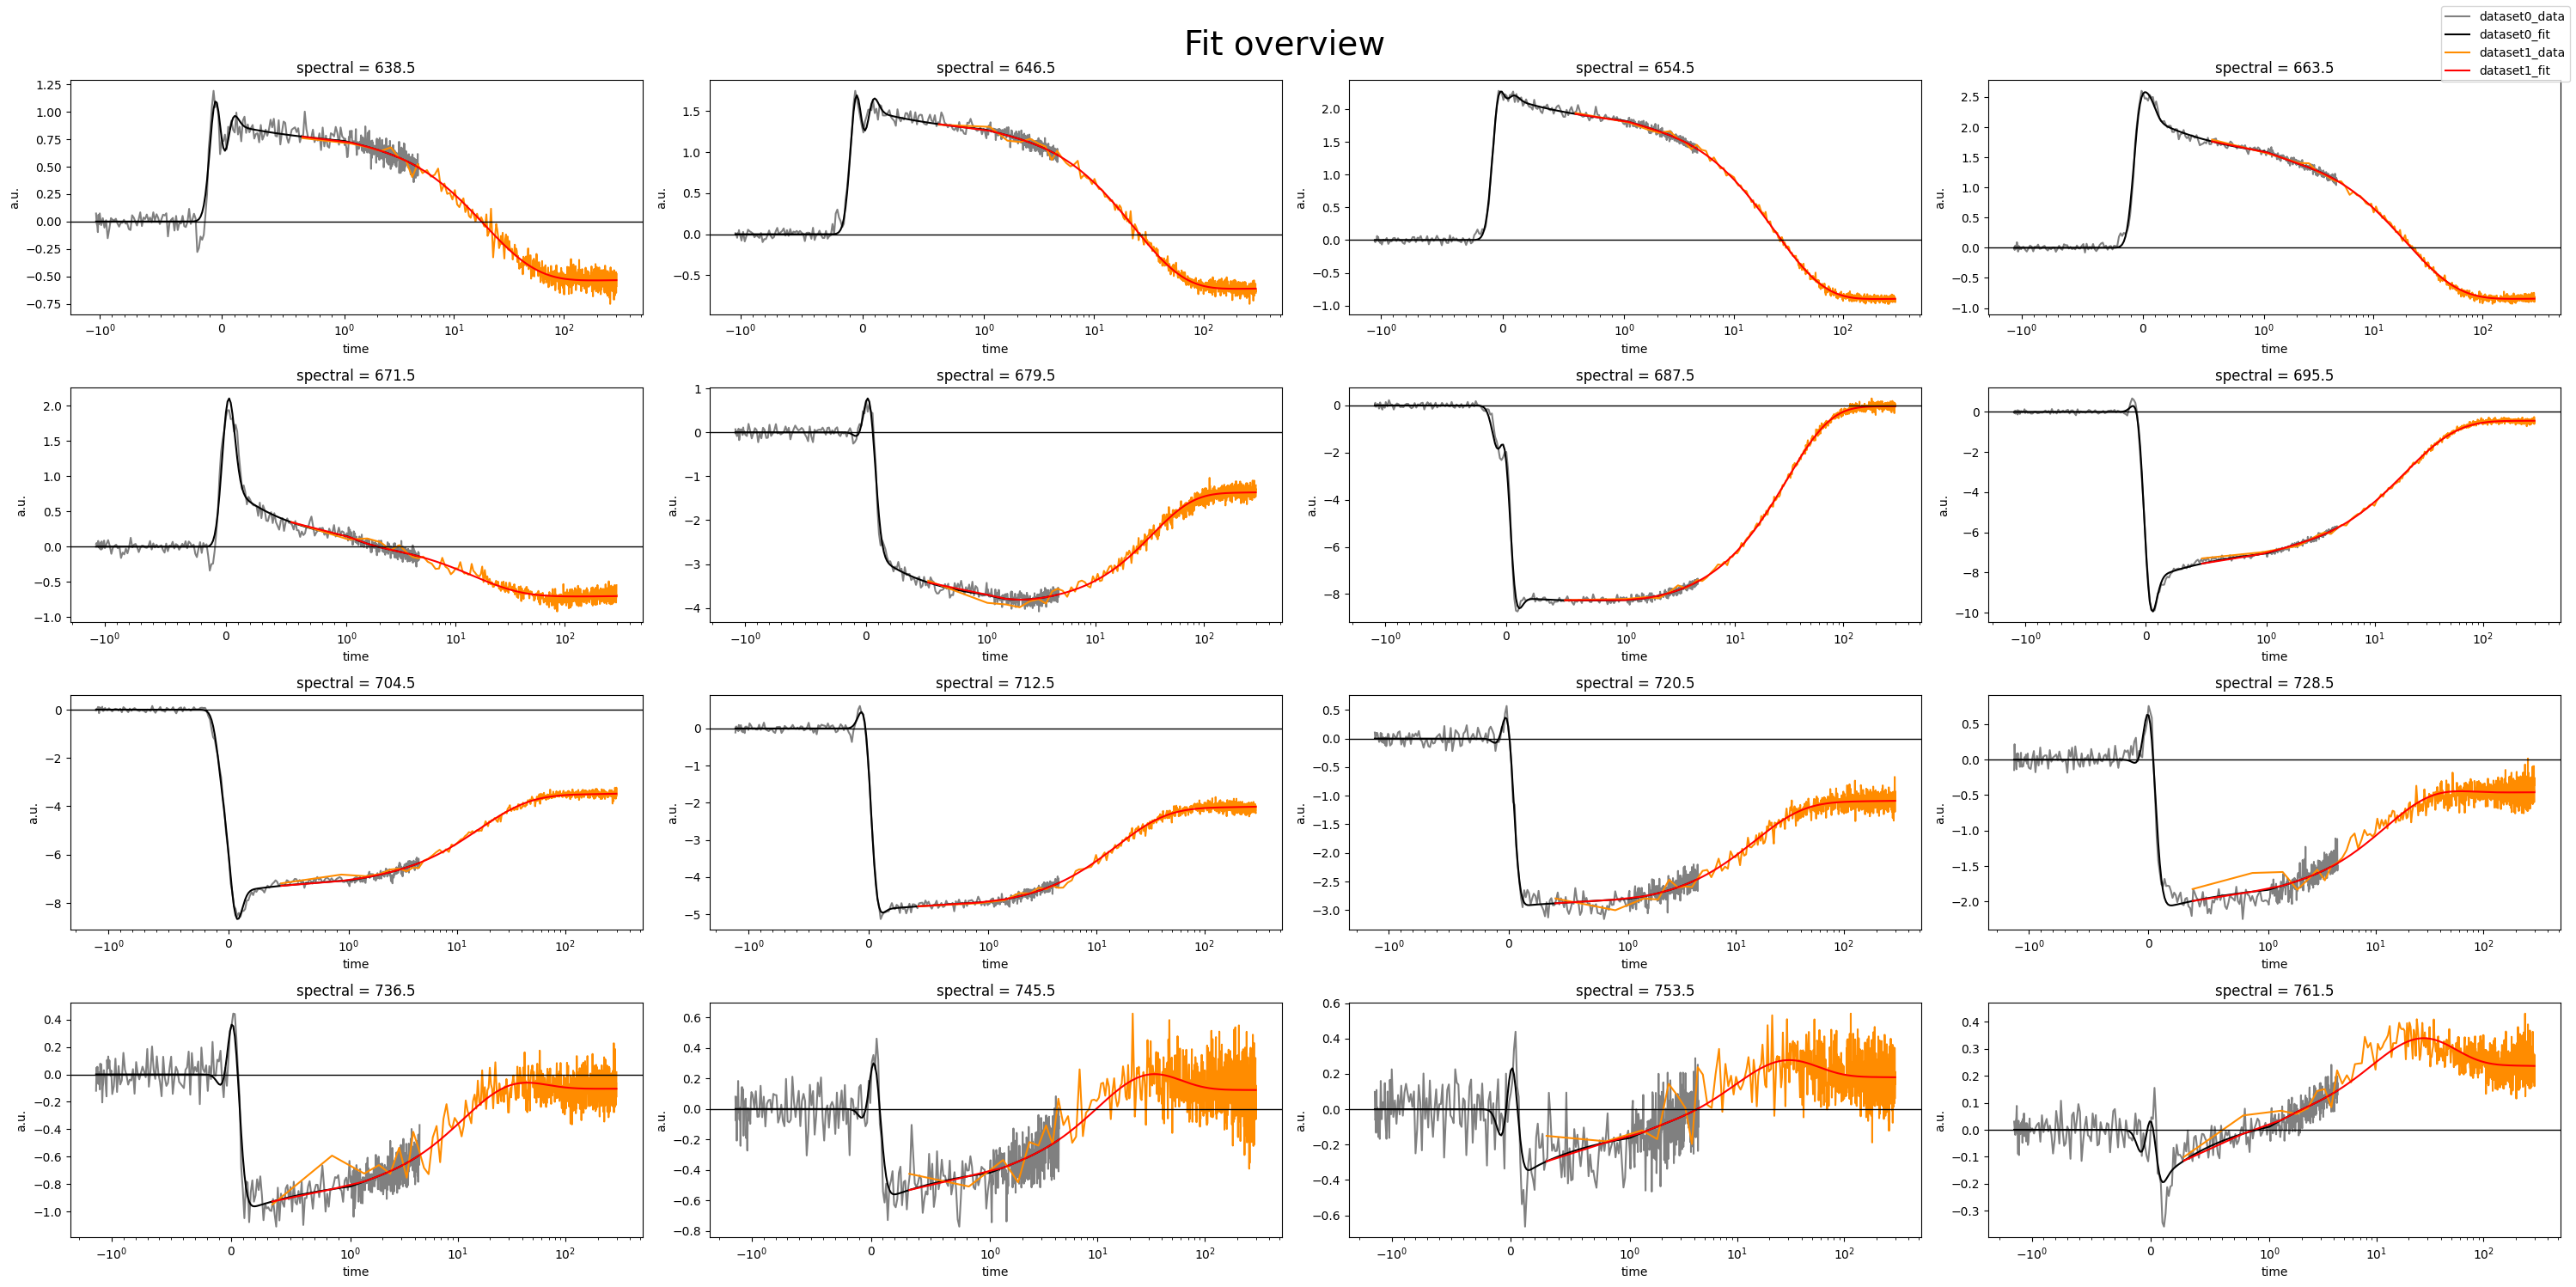

In [128]:
global_result_TA_700 = (
    global_result.data["700TR1"],
    global_result.data["700TR2"],
)
wavelengths = select_plot_wavelengths(global_result_TA_700, equidistant_wavelengths=True)
fig_traces_700  = plot_fitted_traces(global_result_TA_700, wavelengths, linlog=True, linthresh=1)


The above command `plot_fitted_traces` is used to plot a selection of traces for a set of wavelengths (autogenerated using the `select_plot_wavelengths` function).

## Overview 700 exc

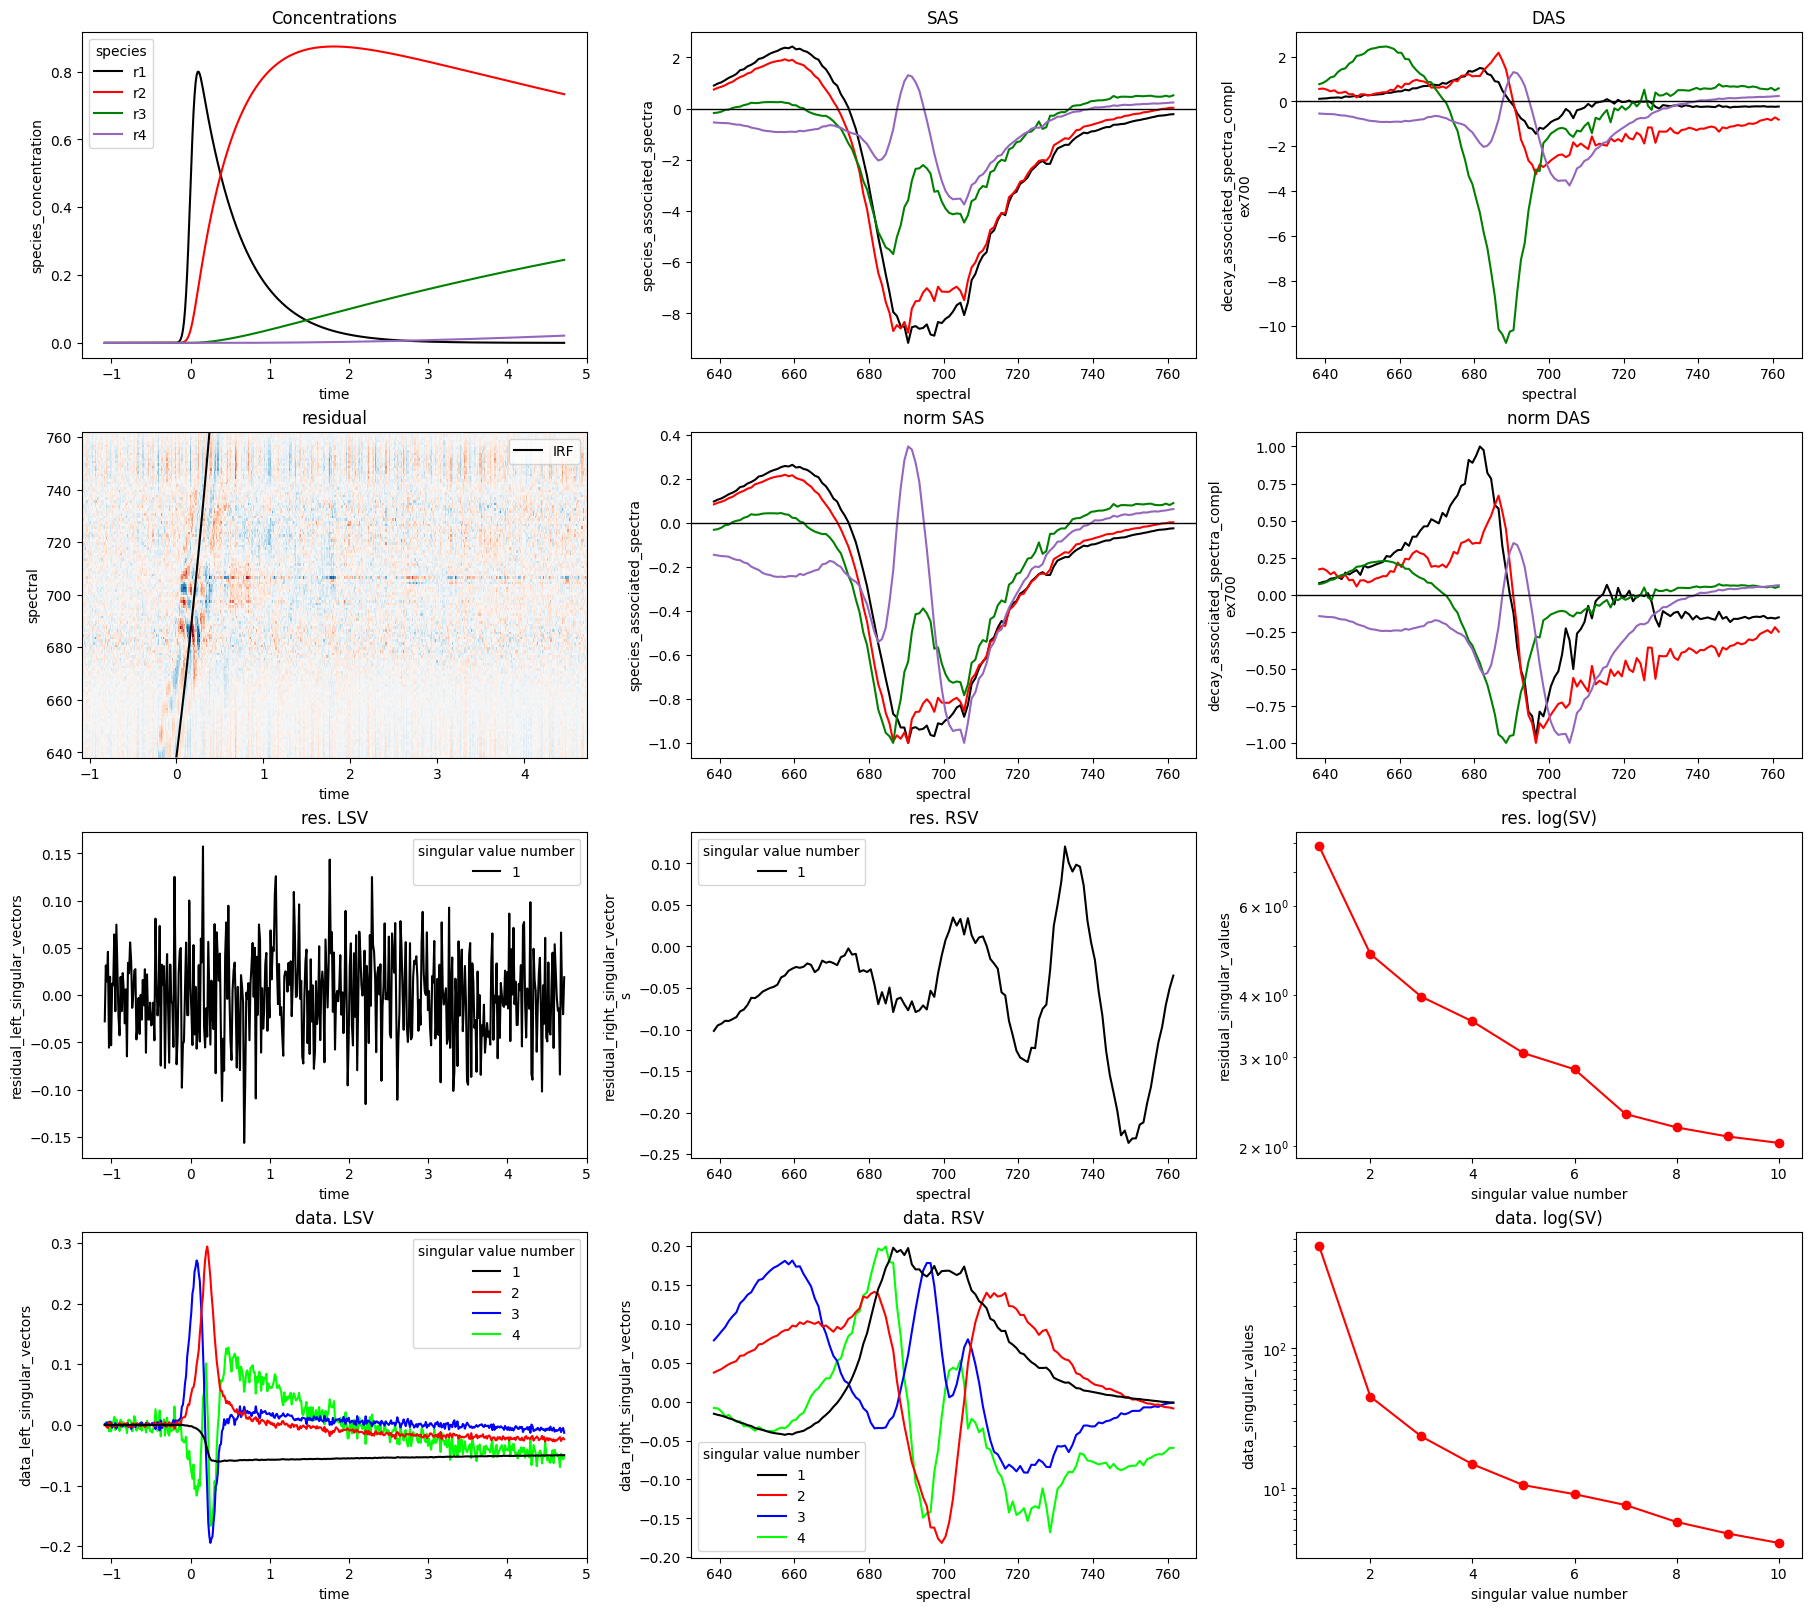

In [129]:
custom_cycler = cycler(color=["k", "r", "g", "tab:purple"])
fig_700TR1 = plot_overview(
    global_result.data["700TR1"],
    nr_of_data_svd_vectors=4,
    nr_of_residual_svd_vectors=1,
    linlog=False,
    linthresh=1,
    cycler=custom_cycler,
    use_svd_number=True,
    svd_cycler=PlotStyle().cycler,
)


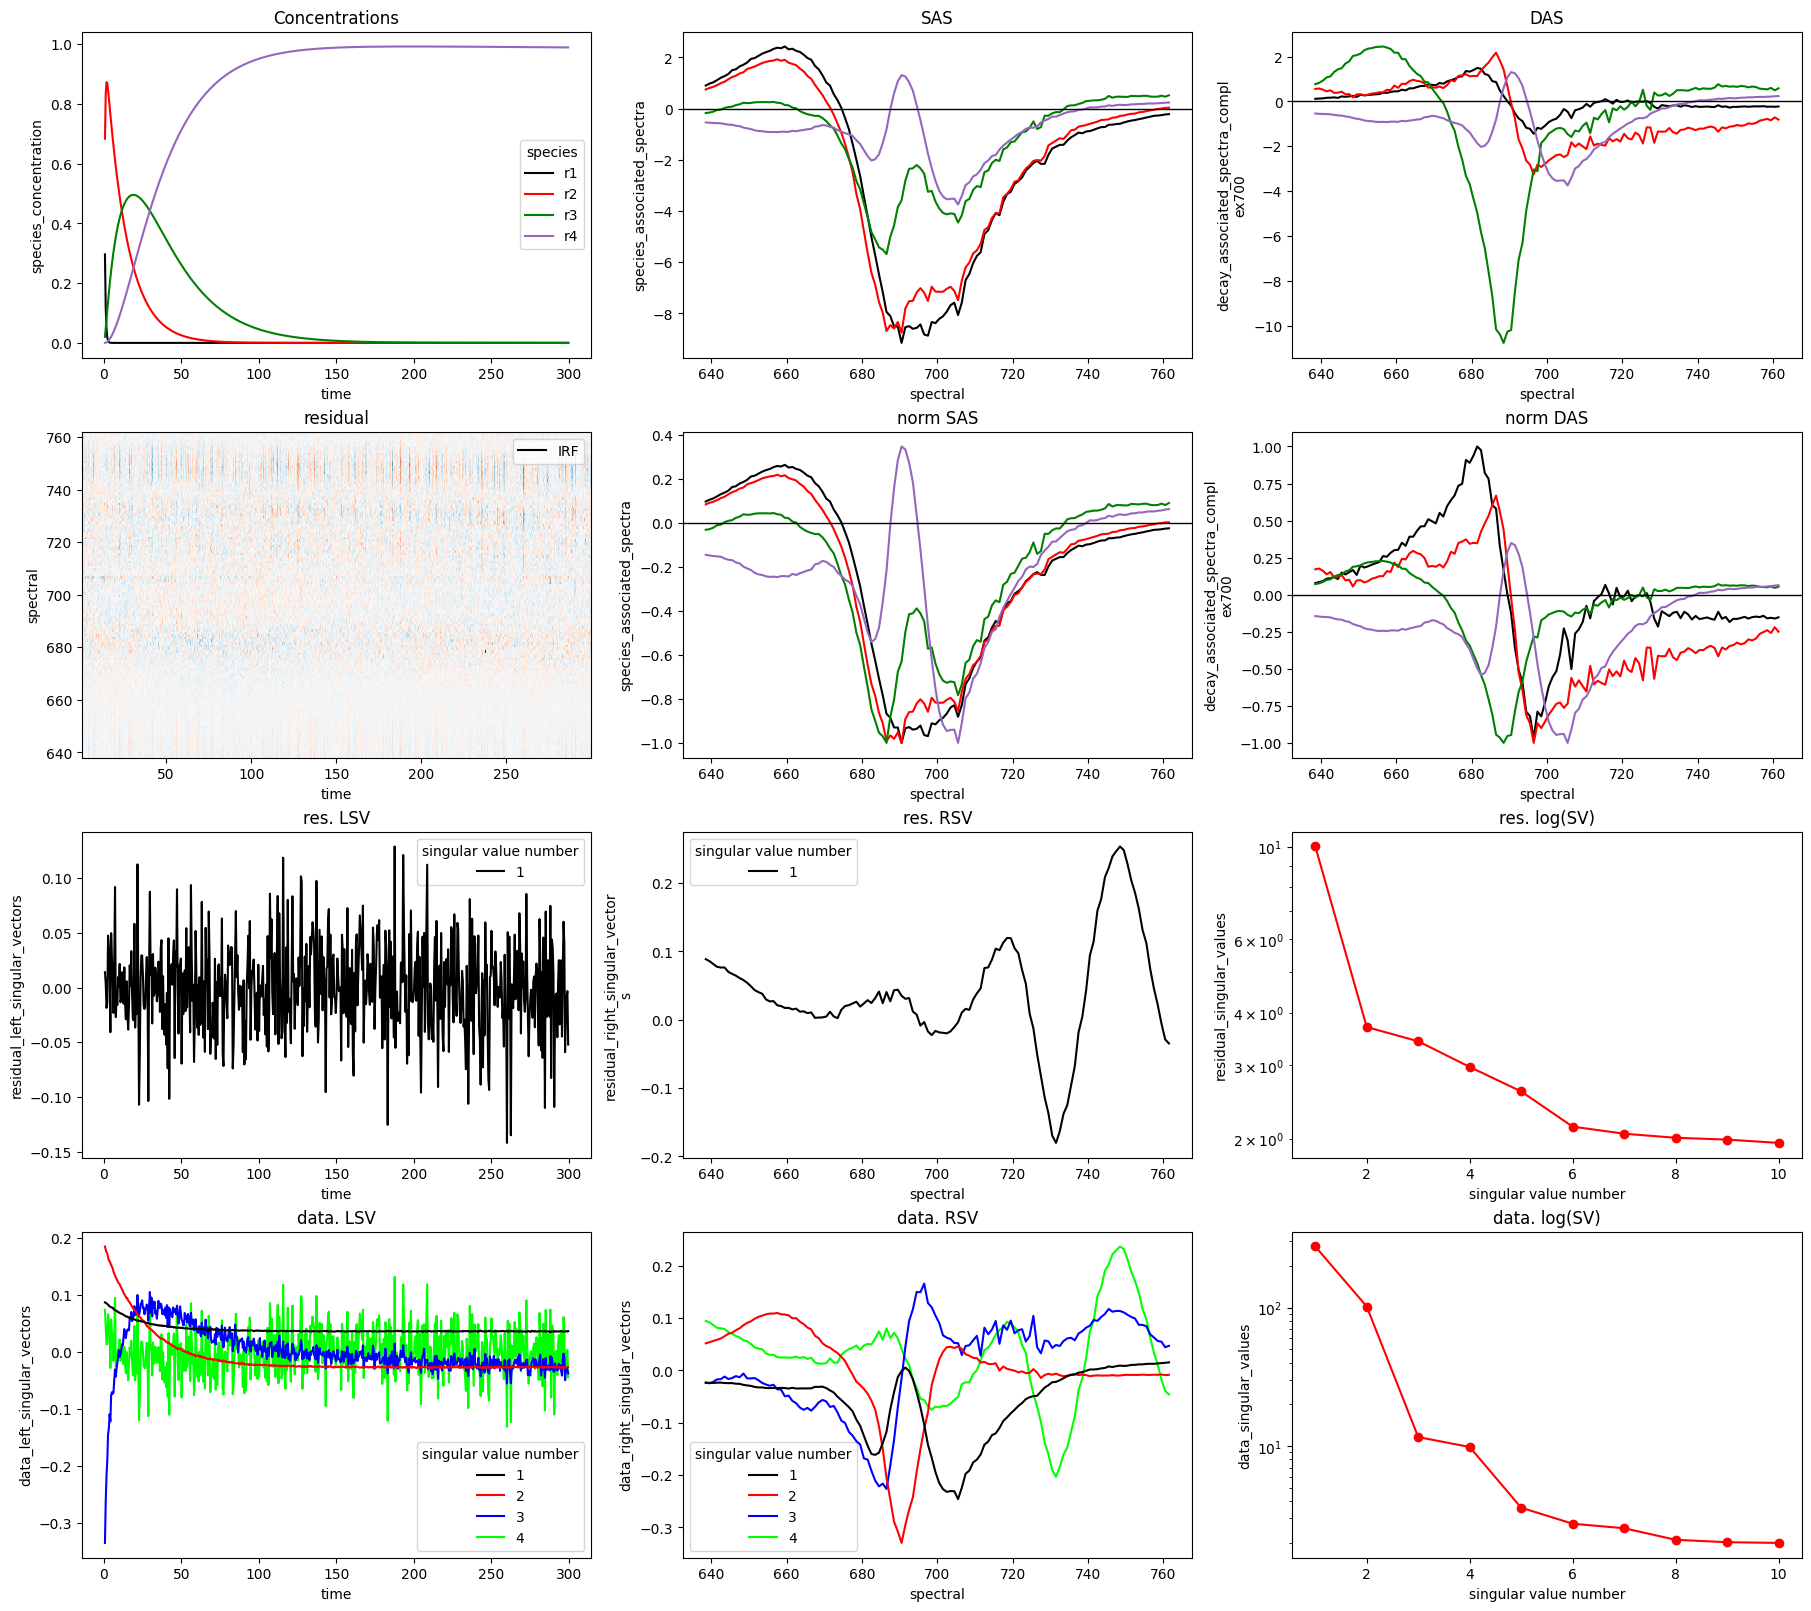

In [130]:
fig_700TR = plot_overview(
    global_result.data["700TR2"],
    nr_of_data_svd_vectors=4,
    nr_of_residual_svd_vectors=1,
    linlog=False,
    linthresh=10,
    cycler=custom_cycler, # defined in cell above
    use_svd_number=True,
    svd_cycler=PlotStyle().cycler,
)


## Coherent Artifact


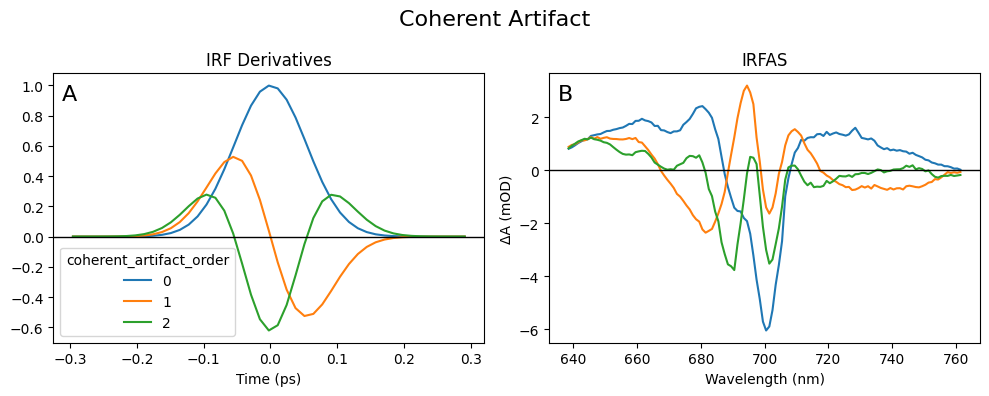

In [131]:
from pyglotaran_extras import plot_coherent_artifact

fig, axes = plot_coherent_artifact(
    global_result.data["700TR1"], time_range=(-0.3, 0.3), figsize=(10, 4)
)
axes[0].set_xlabel("Time (ps)")
axes[1].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("")
axes[0].annotate("A", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=16)
fig.tight_layout()


## Plot result for interpretation


In [132]:
# [ "tab:grey","tab:orange",  ColorCode.cyan, ColorCode.green,"m", "y", "k","r", "b", "tab:purple"]
custom_cycler = cycler(color=["k", "r", "g", "tab:purple"])

fig, axes = plot_concentration_and_spectra(
    global_result.data["700TR1"], global_result.data["700TR2"], cycler=custom_cycler
)
axes[0].set_xlabel("Time (ps)")
axes[0].set_ylabel("")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("EADS (mOD)")
axes[1].set_title("EADS")
axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("DADS (mOD)")
axes[2].set_title("DADS")
axes[1].axhline(0, color="k", linewidth=1)
axes[0].annotate("A", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[2].annotate("C", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)


TypeError: plot_concentration_and_spectra() got an unexpected keyword argument 'cycler'

In [ ]:
global_result700.data["700TR1"].species_associated_spectra[:, 3]


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
# plot_sas(global_result.data["700TR1"], axes[1], cycler=custom_cycler)
final670 = global_result670.data["670TR1"].species_associated_spectra[:, 4]
final700 = 0.85 * global_result700.data["700TR1"].species_associated_spectra[:, 3]
diff = final670 - final700
# global_result700.data["700TR1"].species_associated_spectra[:,3].plot.line(x="spectral", ax=axes[0],color="purple")
final700.plot.line(x="spectral", ax=axes[0], color="k", label="700 exc")
# global_result670.data["670TR1"].species_associated_spectra[:,4].plot.line(x="spectral", ax=axes[0],color="magenta")
final670.plot.line(x="spectral", ax=axes[0], color="r", label="670 exc")
diff.plot.line(x="spectral", ax=axes[1])
axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("EADS (mOD)")
axes[0].set_title("final EADS")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("difference (mOD)")
axes[1].set_title("difference final EADS")
axes[1].axhline(0, color="k", linewidth=1)
axes[0].legend()
axes[0].annotate("A", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)


## Residual analysis of the 700 nm excitation TR1 data

In [ ]:
fig, axes = plot_residual_and_svd(global_result.data["700TR1"])
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[2].annotate("C", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)



# Step 2c Simultaneous global analysis of TA of WL-PSI of SCy6803

### Inspect data

## Global Analysis

### Used model and parameters

In [ ]:
global_model_path = "models/global_step4_model_PSI_TA_SCy6803WL670and700.yml"


In [ ]:
global_parameters_path = "models/global_step4_parameters_PSI_TA_SCy6803WL670and700.csv"
optimized_parameters = load_parameters(global_parameters_path)


#### Model file

In [ ]:
# Uncomment the following 2 lines to display the global model file in the notebook
# from glotaran.utils.ipython import display_file
# display_file(global_model_path, syntax="yaml")

# Alternatively (recommended), open the file in a text editor to see the model definition


#### Parameters file

In [ ]:
# Uncomment the next line and run the cell to print the starting values of the analysis
# These starting values have already been optimized, hence the name optimized_parameters

# optimized_parameters


### Create scheme and optimize it

In [ ]:
global_scheme = Scheme(
    model=global_model_path,  # type: ignore
    parameters=optimized_parameters,
    maximum_number_function_evaluations=5,
    clp_link_tolerance=0.1,
    data={
        # TA data
        "670TR1": DATA_PATH1,
        "670TR2": DATA_PATH2,
        "700TR1": DATA_PATH3,
        "700TR2": DATA_PATH4,
    },  # type: ignore
)
global_scheme.validate()


In [ ]:
global_result = optimize(global_scheme, raise_exception=True)


To save the results of the optimization we can use the `save_result` command.

Because it saves *everything* it consumes about 50MB of disk space per save.

In [ ]:
save_result(
    result=global_result,
    result_path="results/global670and700/result.yaml",
    allow_overwrite=True,
)


### Results and parameters

In [ ]:
# Just call the result to get the optimization result summary.
global_result
# For easier copy-and-paste try:
# print(global_result)


In [ ]:
# Access the result's `optimized_parameters` to print a markdown table of the optimized parameters:
global_result.optimized_parameters


### Amplitude matrices

In [ ]:
show_a_matrixes(global_result)


## Result plots

<sub>Note: The color scheme of the plots in this notebook may not match published figures.</sub>

## Fit quality

In [ ]:
global_result_TA = (
    global_result.data["670TR1"],
    global_result.data["670TR2"],
    global_result.data["700TR1"],
    global_result.data["700TR2"],
)
wavelengths = select_plot_wavelengths(global_result_TA, equidistant_wavelengths=True)
plot_fitted_traces(global_result_TA, wavelengths, linlog=True, linthresh=1)


The above command `plot_fitted_traces` is used to plot a selection of traces for a set of wavelengths (autogenerated using the `select_plot_wavelengths` function).
To show to make a manual selection of traces, and 'dress up the plot' see the code below, which reproduces Figure 2 of the iScience paper.

In [ ]:
# Reproduction of Figure 2 of the iScience paper
import warnings
from pyglotaran_extras.plotting.style import ColorCode as cc

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax_ = plot_fitted_traces(
        global_result_TA,
        [685, 700, 720, 760],
        linlog=True,
        linthresh=1,  # published figure uses 0.3 for easthetic reasons, but here 1 looks better
        axes_shape=(2, 2),
        figsize=(6, 4),
        title="",
        per_axis_legend=True,
        cycler=cycler(
            color=[
                cc.grey,
                cc.black,
                cc.grey,
                cc.black,
                cc.orange,
                cc.red,
                cc.orange,
                cc.red,
            ]
        ),
    )
    handles, labels = ax_.flatten()[0].get_legend_handles_labels()
    for i in range(len(handles)):
        if i == 1:
            labels[i] = "670 nm excitation"
        elif i == 5:
            labels[i] = "700 nm excitation"
        else:
            labels[i] = "_Hidden"
    for idx, ax in enumerate(ax_.flatten()):
        ax.set_ylabel(ax.title.get_text().replace("spectral = ", ""))
        if idx > 1:
            ax.set_xlabel("Time (ps)")
        else:
            ax.set_xlabel("")
        ax.set_title("")
        if ax.get_legend() is not None:
            ax.get_legend().remove()
        for line in ax.lines:
            line.set_linewidth(0.5)  # Set the line width here
    fig.legend(
        handles,
        labels,
        bbox_to_anchor=(0.5, -0.05),
        loc="lower center",
        ncol=len(handles),
    )
    fig.tight_layout()


## Overview 670 exc

In [ ]:
from pyglotaran_extras.plotting.style import ColorCode

plot_overview(
    global_result.data["670TR1"],
    nr_of_data_svd_vectors=4,
    nr_of_residual_svd_vectors=2,
    linlog=False,
    linthresh=1,
    cycler=cycler(
        color=[
            "tab:grey",
            "tab:orange",
            ColorCode.cyan,
            ColorCode.green,
            "m",
            "y",
            "k",
            "r",
            "b",
            "tab:purple",
        ]
    ),
    use_svd_number=True,
    das_cycler=PlotStyle().cycler,
    svd_cycler=PlotStyle().cycler,
)


## Residual analysis of the 670 nm excitation TR1 data

In [ ]:
fig, axes = plot_residual_and_svd(global_result.data["670TR1"])
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[2].annotate("C", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)


In [ ]:
global_result.data["670TR2"]


## Residual analysis of all data

In [ ]:
fig, axes = plot_svd_of_residual(
    global_result.data["670TR1"],
    global_result.data["670TR2"],
    global_result.data["700TR1"],
    global_result.data["700TR2"],
    linlog=True,
    linthresh=1,
    index=0,
)
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)


In [ ]:
global_result.data["700TR2"].residual.plot(x="time")


In [ ]:
global_result.data["700TR2"].weighted_residual.plot(x="time")


In [ ]:
global_result.data["700TR1"].weighted_residual.plot(x="time")


In [ ]:
global_result.data["700TR2"].residual_right_singular_vectors.isel(
    spectral=slice(56, 72), right_singular_value_index=0
).plot()


In [ ]:
global_result.data["700TR2"].weighted_residual_right_singular_vectors.isel(
    spectral=slice(56, 72), right_singular_value_index=0
).plot()


In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(3, 2))
global_result.data["700TR1"].data.plot(
    x="time", ax=axis, vmin=-5, vmax=5, cmap="seismic"
)
axis.set_xlabel("Time (ps)")
axis.set_ylabel("Wavelength (nm)")


In [ ]:
fig, axes = plot_svd_of_residual(
    global_result.data["670TR1"],
    global_result.data["670TR2"],
    global_result.data["700TR1"],
    global_result.data["700TR2"],
    linlog=True,
    linthresh=1,
    index=1,
)
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[0].set_title("residual 2nd LSV")
axes[1].set_title("residual 2nd RSV")


In [ ]:
plot_overview(
    global_result.data["670TR2"],
    nr_of_data_svd_vectors=4,
    nr_of_residual_svd_vectors=2,
    linlog=False,
    linthresh=1,
    cycler=cycler(
        # color=[ "tab:grey","tab:orange",  "c", "g","m", "y", "k","r", "b", "tab:purple"]
        color=[
            "tab:grey",
            "tab:orange",
            ColorCode.cyan,
            ColorCode.green,
            "m",
            "y",
            "k",
            "r",
            "b",
            "tab:purple",
        ]
    ),
    use_svd_number=True,
    das_cycler=PlotStyle().cycler,
    svd_cycler=PlotStyle().cycler,
)


## Overview 700 exc

In [ ]:
plot_overview(
    global_result.data["700TR1"],
    nr_of_data_svd_vectors=4,
    nr_of_residual_svd_vectors=2,
    linlog=False,
    linthresh=1,
    cycler=cycler(color=["k", "r", "g", "tab:purple"]),
    use_svd_number=True,
    svd_cycler=PlotStyle().cycler,
)


In [ ]:
plot_overview(
    global_result.data["700TR2"],
    nr_of_data_svd_vectors=4,
    nr_of_residual_svd_vectors=2,
    linlog=False,
    linthresh=1,
    cycler=cycler(color=["k", "r", "g", "tab:purple"]),
    use_svd_number=True,
    svd_cycler=PlotStyle().cycler,
)


## Residual analysis of the 700 nm excitation TR2 data

In [ ]:
fig, axes = plot_residual_and_svd(global_result.data["700TR2"])
axes[0].annotate("A", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)
axes[2].annotate("C", xy=(-0.1, 1), xycoords="axes fraction", fontsize=16)


## Plot result for interpretation


In [ ]:
myFRLcolors = [
    "tab:grey",
    "tab:orange",
    ColorCode.cyan,
    ColorCode.green,
    "m",
    "y",
    "k",
    "r",
    "b",
    "tab:purple",
]
custom_cycler = cycler(color=myFRLcolors)


fig, axes = plot_concentration_and_spectra(
    global_result.data["670TR1"], global_result.data["670TR2"], custom_cycler
)
axes[0].set_xlabel("Time (ps)")
axes[0].set_ylabel("")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("EADS (mOD)")
axes[1].set_title("EADS")
axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("DADS (mOD)")
axes[2].set_title("DADS")
axes[1].axhline(0, color="k", linewidth=1)
axes[0].annotate("A", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[2].annotate("C", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)


In [ ]:
myFRLcolors = ["k", "r", "g", "tab:purple"]

custom_cycler = cycler(color=myFRLcolors)


fig, axes = plot_concentration_and_spectra(
    global_result.data["700TR1"], global_result.data["700TR2"]
)
axes[0].set_xlabel("Time (ps)")
axes[0].set_ylabel("")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("EADS (mOD)")
axes[1].set_title("EADS")
axes[1].axhline(0, color="k", linewidth=1)
axes[2].set_xlabel("Wavelength (nm)")
axes[2].set_ylabel("DADS (mOD)")
axes[2].set_title("DADS")
axes[0].annotate("D", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[1].annotate("E", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)
axes[2].annotate("F", xy=(-0.05, 1.02), xycoords="axes fraction", fontsize=16)


## Coherent Artifact


In [ ]:
from pyglotaran_extras import plot_coherent_artifact

fig, axes = plot_coherent_artifact(
    global_result.data["670TR1"], time_range=(-0.3, 0.3), figsize=(10, 4)
)
axes[0].set_xlabel("Time (ps)")
axes[1].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("")
axes[0].annotate("A", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=16)
fig.tight_layout()


In [ ]:
from pyglotaran_extras import plot_coherent_artifact

fig, axes = plot_coherent_artifact(
    global_result.data["700TR1"], time_range=(-0.3, 0.3), figsize=(10, 4)
)
axes[0].set_xlabel("Time (ps)")
axes[1].set_xlabel("Wavelength (nm)")
axes[0].set_ylabel("")
axes[0].annotate("A", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=16)
axes[1].annotate("B", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=16)
fig.tight_layout()


## Overview of the estimated DOAS and phases of 670 nm excitation data

In [ ]:
from pyglotaran_extras import plot_doas
from pyglotaran_extras.plotting.style import ColorCode

fig, axes = plot_doas(
    global_result.data["670TR1"],
    damped_oscillation=["osc1"],
    time_range=(-0.3, 0.3),
    spectral=700,
    figsize=(15, 4),
    normalize=False,
    # oscillation_type="sin",
    # center_λ=550,
)

axes[0].set_xlabel("Time (ps)")
axes[0].axhline(0, color="k", linewidth=1)
axes[1].set_xlabel("Wavelength (nm)")
axes[2].set_xlabel("Wavelength (nm)")
axes[1].set_ylabel("")
axes[1].set_title("DOAS")
# axes[0].annotate("A", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
# axes[1].annotate("B", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
# axes[2].annotate("C", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
axes[0].annotate("C", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
axes[1].annotate("D", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)
axes[2].annotate("E", xy=(0.01, 0.89), xycoords="axes fraction", fontsize=16)


In [ ]:
from glotaran.io import save_dataset
from glotaran.utils.io import create_clp_guide_dataset

for species in global_result.data["670TR2"].species:
    clp_guide = create_clp_guide_dataset(global_result.data["670TR2"], species.item())
    string_in_string = "guide/global670and700_670TR2_clp_{}.ascii".format(
        species.item()
    )
    save_dataset(clp_guide.data, string_in_string, allow_overwrite=True)
